In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/intro-to-data-cleaning-eda-and-machine-learning.html
/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv


# Step 1: Load | Preview | inspect
## 1 Load the Dataset and Inspect
Load the dataset using pandas to check for missing data, inconsistencies in column names, or improper encoding.

## 2 Preview the data 
Preview the data using the head() function to ensure that the data has been loaded correctly.

## 3 Check for missing values or anomalies
Check for missing values or anomalies (e.g., wrong data types, strange values in numeric columns) that could affect analysis.

In [2]:
# Import the necessary libraries
import pandas as pd

# Load the dataset from your URL or local file
url = "https://learn.walsoftcomputers.com/csv/bi.csv"
data = pd.read_csv(url, encoding='ISO-8859-1')  # Western European Encoding (ISO)

# Preview the data (first 5 rows)
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [3]:
# Check for missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [4]:
# Check for any null values
data.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

# Step 2: Data Cleaning
**Handling Missing Values and Inconsistencies**

Great! Now that you've identified missing values in the Python column and inconsistencies in the **Country**, **Gender**, and **Residence** columns, let’s address these issues step by step. 



**Objective**:  
1. Fill missing values in the **Python** column.
2. Standardize inconsistencies in the **Country**, **Gender**, and **Residence** columns.

## 1 Missing Values in the **Python** Column:
There are several ways to handle missing values, depending on the situation:
- **Option 1**: Replace missing values with the mean or median of the column.
- **Option 2**: Fill with a specific value, like `0` or `Not Available`.
- **Option 3**: Drop rows with missing data (if they're not significant).

## 2 Inconsistencies in the **Country**, **Gender**, and **Residence** Columns:
We can standardize these columns by:
- **Country**: Ensuring all country names are in proper format (e.g., capitalize first letter).
- **Gender**: Converting all gender values to either "Male" or "Female".
- **Residence**: Standardize residence names for consistency.
- **prevEducation**: Standardize any inconsistency in prevEducation

Here’s how to proceed with the cleaning:

In [5]:
# Handle missing values in the 'Python' column
# Fill missing values with the mean of the 'Python' column
data['Python'] = data['Python'].fillna(data['Python'].mean())

# Check the info of the DataFrame again to confirm that there are no missing values
data_info = data.info()
print("\nData Info After Filling Missing Values:\n", data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB

Data Info After Filling Missing Values:
 None


In [6]:
# Step 1: Check unique values in the 'gender' column before standardization

# Retrieve the unique values in the 'gender' column
unique_genders_before = data['gender'].unique()

# Display unique genders before standardization
print("Unique Genders Before Standardization:")
print(', '.join(unique_genders_before))


Unique Genders Before Standardization:
Female, M, Male, F, female, male


In [7]:
# Now, Standardize the 'gender' column

# Convert gender values to lowercase and remove leading/trailing spaces
data['gender'] = data['gender'].str.strip().str.lower()

# Standardizing gender values
data['gender'] = data['gender'].replace({'m': 'male', 'male': 'male', 'f': 'female', 'female': 'female'})

# capitalize the first letters
data['gender'] = data['gender'].str.capitalize()

# Checking unique values after standardization
unique_genders_after = data['gender'].unique()

# Display unique genders after standardization
print("Unique Genders After Standardization:")
print(', '.join(unique_genders_after))


Unique Genders After Standardization:
Female, Male


In [8]:
# Step 1: Check unique values in the 'country' column before standardization
unique_countries_before = data['country'].unique()
print("Unique Countries Before Standardization:")
print(', '.join(unique_countries_before))



Unique Countries Before Standardization:
Norway, Kenya, Uganda, Rsa, South Africa, Norge, norway, Denmark, Netherlands, Italy, Spain, UK, Somali, Nigeria, Germany, France


### Observations on Countries
1. Norway and Norge refer to the same country (standardize to Norway)
2. Rsa, South Africa also refer to the same Country (Standardize to RSA)

In [9]:
# Step 2: Standardize the 'country' column

# Convert country values to title case and remove leading/trailing spaces
data['country'] = data['country'].str.strip().str.title()

# Standardizing Norway, Norge, Rsa and South Africa values
data['country'] = data['country'].replace({'Rsa': 'RSA', 'South Africa': 'RSA', 'Norge': 'Norway'})
 
# Checking unique values after standardization
unique_countries_after = data['country'].unique()

# Display unique countries after standardization
print("Unique Countries After Standardization:")
print(', '.join(unique_countries_after))

Unique Countries After Standardization:
Norway, Kenya, Uganda, RSA, Denmark, Netherlands, Italy, Spain, Uk, Somali, Nigeria, Germany, France


In [10]:
# Step 3: Standardize the 'residence' column

# Check unique values in the 'residence' column before standardization
unique_residences_before = data['residence'].unique()
print("Unique Residences Before Standardization:")
print(', '.join(unique_residences_before))




Unique Residences Before Standardization:
Private, Sognsvann, BI Residence, BI-Residence, BIResidence, BI_Residence


### Observations on the residence column
- `BI Residence`, `BI-Residence`, `BIResidence`, `BI_Residence` all mean BI Residence

In [11]:
# Standardize the 'residence' column

# Standardize BI Residence
data['residence'] = data['residence'].replace({'BI-Residence': 'BI Residence', 'BIResidence': 'BI Residence', 'BI_Residence': 'BI Residence'})

# Checking unique values after standardization
unique_residences_after = data['residence'].unique()

# Display unique residences after standardization
print("Unique Residences After Standardization:")
print(', '.join(unique_residences_after))

Unique Residences After Standardization:
Private, Sognsvann, BI Residence


### Cleaning Previous Education: prevEducation Colum

In [12]:
# Check unique values in the 'prevEducation' column before standardization
unique_edu_levels_before = data['prevEducation'].unique()
print("Unique Previous education levels Before Standardization:")
print(', '.join(unique_edu_levels_before))



Unique Previous education levels Before Standardization:
Masters, Diploma, HighSchool, High School, Bachelors, Barrrchelors, diploma, DIPLOMA, Diplomaaa, Doctorate


### Observation
 - Masters is OK, 
 - Diploma is OK,
 - Doctorate is OK
 - HighSchool = High School, 
 - Bachelors, Barrrchelors, = Bachelor
 - diploma, DIPLOMA, Diplomaaa = Diploma

In [13]:
# Standardize the 'prevEducation' column

# Standardize High School
data['prevEducation'] = data['prevEducation'].replace({'HighSchool': 'High School'})

# Standardize Diploma
data['prevEducation'] = data['prevEducation'].replace({'DIPLOMA': 'Diploma', 'diploma': 'Diploma', 'Diplomaaa': 'Diploma'})

# Standardize Bachelor
data['prevEducation'] = data['prevEducation'].replace({'Bachelors': 'Bachelor', 'Barrrchelors': 'Bachelor'})

# Checking unique values after standardization
unique_edu_levels_after = data['prevEducation'].unique()

# Display unique Previous Education levels after standardization
print("Unique Previous Education Levels After Standardization:")
print(', '.join(unique_edu_levels_after))

Unique Previous Education Levels After Standardization:
Masters, Diploma, High School, Bachelor, Doctorate


# Step 3 Previewing Data After Cleaning
**A Critical Step in Data Preparation**

After data cleaning, previewing the dataset is an essential step to ensure that the cleaning process has been effective. This step allows us to validate that missing values, outliers, and errors have been addressed correctly. It also helps verify the consistency and structure of the dataset, and may reveal additional patterns or issues that require further attention. Previewing the data ensures it is ready for subsequent analysis, visualization, or machine learning tasks, ensuring a smooth transition into advanced stages of data exploration.

We start with the Shape

## Dataset Shape

In [14]:
data.shape

(77, 11)

## First 5 Rows

In [15]:
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.000000,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.000000,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.000000,50
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40,High School,120,75.853333,44
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65,High School,122,91.000000,80


### Observation on the Data type
**`Convert` `entryEXAM`, `studyHOURS`, `Python` and `DB` to Float with 2 decimal places**

In [16]:
# Ensure all relevant columns are formatted to two decimal places
data['entryEXAM'] = data['entryEXAM'].map('{:.2f}'.format)
data['studyHOURS'] = data['studyHOURS'].map('{:.2f}'.format)
data['Python'] = data['Python'].map('{:.2f}'.format)
data['DB'] = data['DB'].map('{:.2f}'.format)

# Verify the changes but with the last 5 Rows
data.tail()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
72,Clara,Bernard,43,Female,France,Private,80.00,Bachelor,150.00,75.00,43.00
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90.00,Masters,158.00,84.00,83.00
74,Sophie,Brown,33,Female,Uk,Sognsvann,96.00,Masters,158.00,85.00,90.00
75,Leon,Bauer,35,Male,Germany,Sognsvann,90.00,Masters,160.00,87.00,74.00
76,Mohammed,Salim,31,Male,Somali,Sognsvann,35.00,Masters,144.00,72.00,90.00


## Recheck for Missing values

In [17]:
# Check for missing values
data.isnull().sum()


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

## Review The Data Structure
Ensure the overall structure and types of columns are as expected.

In [18]:
# Checking data structure
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fNAME          77 non-null     object
 1   lNAME          77 non-null     object
 2   Age            77 non-null     int64 
 3   gender         77 non-null     object
 4   country        77 non-null     object
 5   residence      77 non-null     object
 6   entryEXAM      77 non-null     object
 7   prevEducation  77 non-null     object
 8   studyHOURS     77 non-null     object
 9   Python         77 non-null     object
 10  DB             77 non-null     object
dtypes: int64(1), object(10)
memory usage: 6.7+ KB


### Observation on all the float columns
After appliying the string formatting `("{:.2f}".format())`, the columns were converted from numeric types (e.g., float) to strings (object). This affects our ability to perform numerical operations on them.

To keep the values numeric while also ensuring they display with two decimal places, we should not change the data type but rather control the display format.

Here’s how we can fix it:

**Ensure that columns are still floats and then:**
Use `pd.options.display.float_format` to format how floats are displayed in pandas without changing their underlying types.

In [19]:
# Ensure the columns are floats
data['entryEXAM'] = data['entryEXAM'].astype(float)
data['studyHOURS'] = data['studyHOURS'].astype(float)
data['Python'] = data['Python'].astype(float)
data['DB'] = data['DB'].astype(float)

# Set pandas to display floats with two decimal places
pd.options.display.float_format = '{:.2f}'.format

# Preview the result
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     float64
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     float64
 9   Python         77 non-null     float64
 10  DB             77 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 6.7+ KB


In [20]:
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72.00,Masters,158.00,59.00,55.00
1,Alex,Walekhwa,60,Male,Kenya,Private,79.00,Diploma,150.00,60.00,75.00
2,Philip,Leo,25,Male,Uganda,Sognsvann,55.00,High School,130.00,74.00,50.00
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40.00,High School,120.00,75.85,44.00
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65.00,High School,122.00,91.00,80.00


# Step 4: Exploratory Data Analysis (EDA)
Great! Now that we've handled missing values and standardized inconsistencies in the dataset, the next step is **Exploratory Data Analysis (EDA)**. This step will help us better understand the dataset by visualizing and summarizing the data.



**EDA typically involves:**
1. **Summary Statistics**: Understanding distributions and key statistics.
2. **Data Visualization**: Visualizing relationships, distributions, and outliers.
3. **Correlation Analysis**: Checking for relationships between variables.

We’ll start with some basic **summary statistics** and **visualizations** to uncover patterns and potential issues in the data.

## Summary Statistics

We will use summary statistics to get insights into the **age**, **study hours**, **Python** scores, and **DB** scores.

In [21]:
# Summary statistics for numerical columns
summary_stats = data.select_dtypes(include=np.number).describe()

# Print summary statistics
summary_stats.T

,count,mean,std,min,25%,50%,75%,max
Age,77.00,35.21,10.34,21.00,27.00,33.00,42.00,71.00
entryEXAM,77.00,76.75,16.48,28.00,69.00,80.00,90.00,98.00
studyHOURS,77.00,149.71,12.74,114.00,144.00,156.00,158.00,160.00
Python,77.00,75.85,15.21,15.00,72.00,81.00,85.00,91.00
DB,77.00,69.47,17.03,30.00,56.00,71.00,83.00,100.00


### Here’s a detailed commentary based on the summary statistics:

#### **Age**
- **Count**: 77 people participated in the dataset.
- **Mean (35.21 years)**: The average age is around 35 years, indicating a relatively mature group of students.
- **Standard Deviation (10.34)**: This shows a considerable age variation within the group.
- **Min (21)**: The youngest student is 21 years old.
- **Max (71)**: The oldest student is 71 years old, suggesting a wide age range.
- **Interquartile Range (IQR)**: Most participants are between 27 and 42 years, with 33 years being the median age.

#### **Entry Exam Scores**
- **Mean (76.75)**: On average, students scored about 77 out of 100 on the entry exam.
- **Standard Deviation (16.48)**: This variation shows that some students performed significantly better or worse than others.
- **Min (28)**: The lowest score is 28, which might suggest some participants struggled with the exam.
- **Max (98)**: The highest score is 98, showing that some students excelled.
- **IQR**: The middle 50% scored between 69 and 90, indicating generally high performance.

#### **Study Hours**
- **Mean (149.71 hours)**: On average, students studied for around 150 hours.
- **Standard Deviation (12.74)**: The study hours are somewhat consistent, with only slight variation.
- **Min (114 hours)**: The least dedicated student studied for 114 hours.
- **Max (160 hours)**: The most dedicated studied for 160 hours.
- **IQR**: Most students studied between 144 and 158 hours, showing a tight clustering around the mean.

#### **Python Scores**
- **Mean (75.85)**: The average Python score is about 76 out of 100.
- **Standard Deviation (15.21)**: There's moderate variability in Python scores.
- **Min (15)**: The lowest score is very low (15), indicating that some students struggled significantly.
- **Max (91)**: The highest score is 91, showing some students excelled.
- **IQR**: The majority of scores fall between 72 and 85, indicating solid performance from most students.

#### **Database (DB) Scores**
- **Mean (69.47)**: The average score is around 69 out of 100.
- **Standard Deviation (17.03)**: There’s notable variation in students' performance.
- **Min (30)**: The lowest score is 30, indicating some students struggled significantly.
- **Max (100)**: One student achieved a perfect score of 100.
- **IQR**: Most students scored between 56 and 83, showing a broad range of capabilities in database knowledge.

#### Conclusion
The data shows considerable variability across different parameters, particularly in scores (both Python and DB), while the study hours and age tend to be more tightly clustered.

## Visualizing Distributions

We’ll visualize the distribution of some key columns using histograms and box plots, which will help us spot any outliers or interesting patterns.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

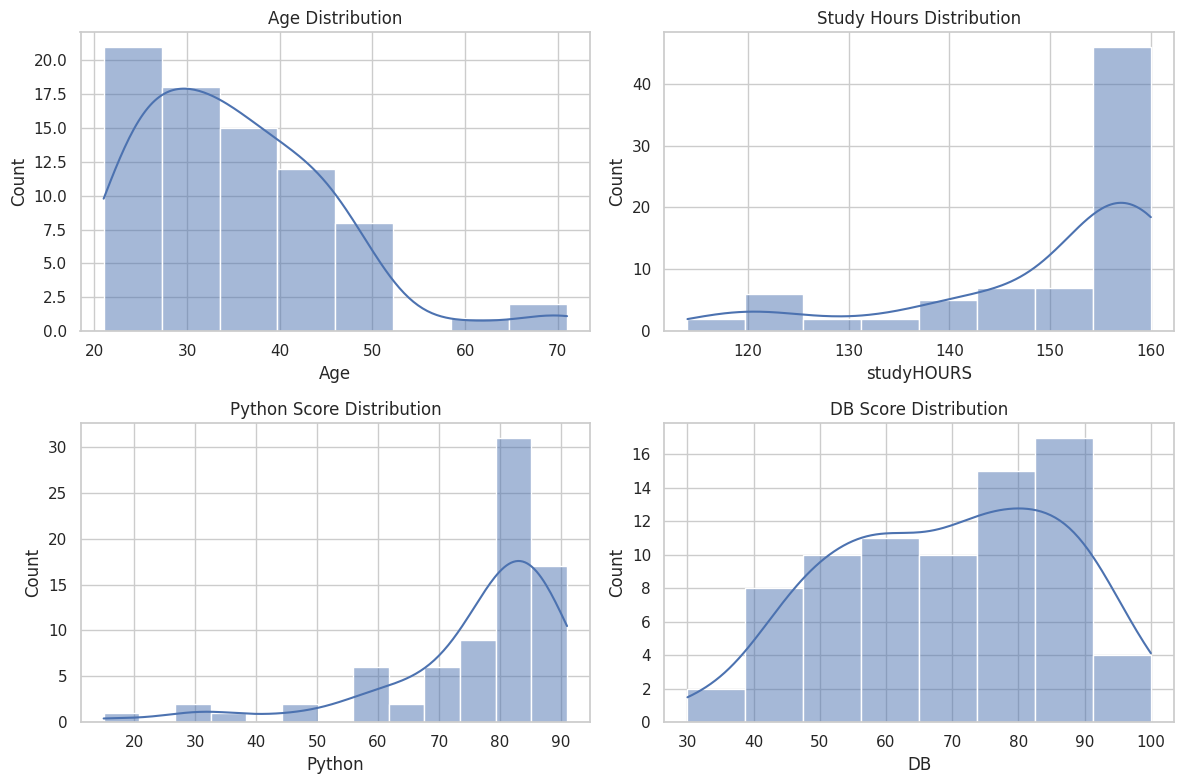

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace Infinite Values
# If infinite values are found, replace them with NaN, 
# and then handle them like you would handle missing values.
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)  

# Set plot style
sns.set(style="whitegrid")

# Histograms of age, study hours, Python, and DB scores
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=data['Age'], kde=True, ax=ax[0, 0]).set(title='Age Distribution')
sns.histplot(data=data['studyHOURS'], kde=True, ax=ax[0, 1]).set(title='Study Hours Distribution')
sns.histplot(data=data['Python'], kde=True, ax=ax[1, 0]).set(title='Python Score Distribution')
sns.histplot(data=data['DB'], kde=True, ax=ax[1, 1]).set(title='DB Score Distribution')

plt.tight_layout()
plt.show()

## Checking Correlations

To understand how different variables are related, we can check the correlations between numerical columns like **Age**, **studyHOURS**, **Python**, and **DB**.

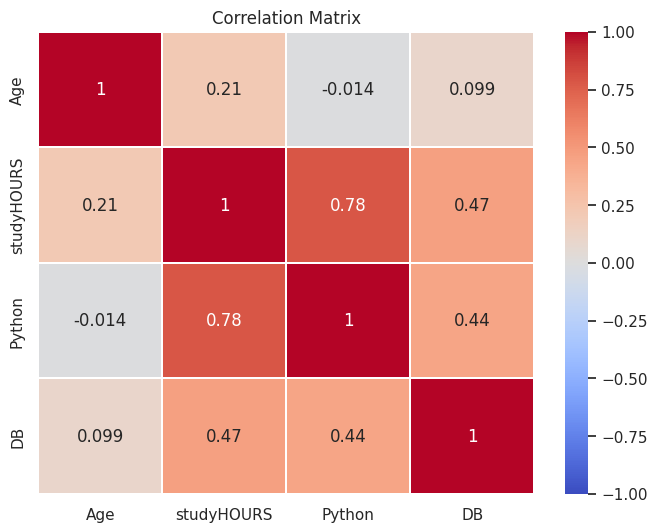

In [23]:
# Correlation matrix
corr_matrix = data[['Age', 'studyHOURS', 'Python', 'DB']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2)
plt.title("Correlation Matrix")
plt.show()

In [24]:
# Correlation matrix table:
corr_matrix

,Age,studyHOURS,Python,DB
Age,1.00,0.21,-0.01,0.10
studyHOURS,0.21,1.00,0.78,0.47
Python,-0.01,0.78,1.00,0.44
DB,0.10,0.47,0.44,1.00


### Correlation Matrix and Interpretation

#### Correlation Matrix

The following table presents the correlation coefficients among the variables:

|           | Age   | studyHOURS | Python | DB    |
|-----------|-------|------------|--------|-------|
| **Age**       | 1.00  | 0.21       | -0.01  | 0.10  |
| **studyHOURS**| 0.21  | 1.00       | 0.78   | 0.47  |
| **Python**    | -0.01 | 0.78       | 1.00   | 0.44  |
| **DB**        | 0.10  | 0.47       | 0.44   | 1.00  |

#### Key Observations

1. **Age and Other Variables**:
   - The correlation between **Age** and **studyHOURS** is **0.21**, suggesting a **weak positive relationship**. This indicates that older students tend to study slightly more, but the relationship is not strong.
   - The correlation between **Age** and **Python** is **-0.01**, indicating virtually no relationship. This suggests that age does not significantly affect Python scores.
   - The correlation between **Age** and **DB** is **0.10**, also indicating a weak positive relationship, meaning that age has little influence on database scores.

2. **Study Hours and Performance**:
   - The correlation between **studyHOURS** and **Python** is **0.78**, indicating a **strong positive relationship**. This suggests that as students increase their study hours, their Python scores tend to increase significantly.
   - The correlation between **studyHOURS** and **DB** is **0.47**, indicating a **moderate positive relationship**. This means that more study hours are also associated with higher scores in database subjects but to a lesser extent than Python.

3. **Python and Database Scores**:
   - The correlation between **Python** and **DB** is **0.44**, indicating a moderate positive relationship. This suggests that students who perform well in Python also tend to perform well in database subjects, although it’s not as strong as the relationship with study hours.

## Conclusion

Overall, the most notable finding from this correlation matrix is the strong relationship between **studyHOURS** and **Python** scores, suggesting that time spent studying is a significant factor in academic performance in programming. Conversely, age does not appear to have a meaningful impact on scores in either subject.

These insights could guide further investigations, such as exploring study habits or developing strategies to enhance performance based on study time allocation.


# Step 5: Important Questions
At this stage, we can begin formulating **serious questions** that stakeholders (such as university administrators, educators, or even students themselves) might want answers to. These questions can help guide decision-making and provide actionable insights based on the dataset. Here are some potential questions we can ask based on the data:

### 1. **Performance-Related Questions**:
   - **Which factors correlate the most with high performance in Python or DB scores?**
     - Do students who study more hours tend to perform better in Python or DB?
     - Does prior education (e.g., diploma, bachelors, masters) have an impact on performance?
   - **Are there specific countries or residences where students perform better or worse?**
     - For example, do students living in BI Residence perform differently from those living in private residences?
   - **Is there any gender disparity in Python and DB performance?**

### 2. **Demographic Insights**:
   - **What is the typical profile of a high-performing student?**
     - Age range, prior education, study hours, etc.
   - **Do older students (age 40+) perform differently compared to younger students (age 20-30)?**
   - **Is there a trend between the countries or regions where students come from and their performance?**
     - Do international students perform differently compared to Norwegian students?

### 3. **Study Habits**:
   - **How much study time is optimal for students to achieve high scores in Python and DB?**
     - Is there a point at which additional study hours no longer contribute to better performance (diminishing returns)?
   - **Do students with higher entry exam scores consistently perform well in both subjects?**

### 4. **Predictive Modeling**:
   - **Can we predict a student's Python or DB score based on their age, previous education, study hours, and entry exam score?**
   - **What factors most strongly predict a student's overall performance?**
     - This could guide admissions or support programs in focusing on key predictors of success.

### 5. **Outliers and Special Cases**:
   - **How should we address students with unusually high or low scores?**
     - Are students who score very low in Python or DB (identified as outliers) struggling due to certain demographic factors, such as residence or prior education?
   - **Are there any specific patterns among students with the highest or lowest study hours?**



### Example of Key Questions for Stakeholders:
1. **For Educators**: "What teaching strategies or resources should be provided to students with diplomas to help them improve their performance in Python and DB?"
2. **For University Administrators**: "Do students in private residences need additional support or resources to perform as well as those living in BI Residence?"
3. **For Students**: "How can I optimize my study hours to achieve better scores in Python and DB?"
4. **For Admissions**: "Which criteria (such as entry exam scores, previous education) should be emphasized during student selection to predict academic success?"


### Next Steps:
We could start testing these hypotheses by running correlation analyses and building some basic models to answer these questions. This will help to uncover the relationships between different variables and support or reject the assumptions we are making.

**But First, lets import dataset `cleaned_bi.csv` Cleaned dataset**

In [25]:
# Import Cleaned CSV
# Load the dataset from your URL or local file
url = "https://learn.walsoftcomputers.com/csv/cleaned_bi.csv"
cleaned_df = pd.read_csv(url, encoding='ISO-8859-1')  # Western European Encoding (ISO)

cleaned_df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.00,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.00,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.00,50
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40,High School,120,75.85,44
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65,High School,122,91.00,80


In [26]:
# Any Duplicates?
duplicate_count = cleaned_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


# Step 6: Solutions 

**To address the questions we formulated earlier for stakeholders based on this cleaned dataset, we can proceed by answering them step by step using Python code. Below is how we can approach each question.**



### **Question 1:**
**What is the relationship between study hours and Python scores, and does a higher number of study hours correlate with better performance in Python?**

To explore this, we will analyze the correlation between study hours and Python scores and visualize this relationship with a scatter plot. Let's calculate the correlation coefficient to quantify the strength of the relationship.

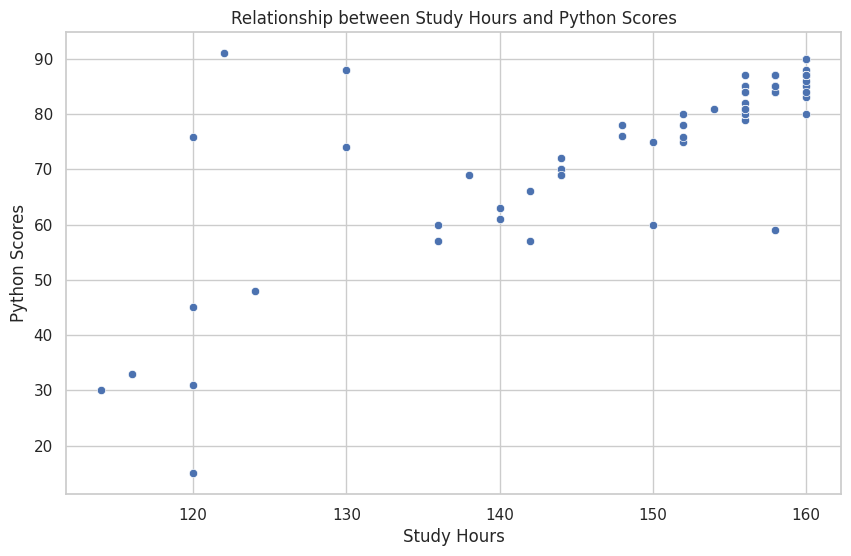


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
The Correlationship between Study Hours and Python Scores is: 0.78


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x=cleaned_df['studyHOURS'], y=cleaned_df['Python'])
plt.title("Relationship between Study Hours and Python Scores")
plt.xlabel("Study Hours")
plt.ylabel("Python Scores")
plt.show()

# Correlation coefficient
correlation = cleaned_df['studyHOURS'].corr(cleaned_df['Python'])
print()
print(' * '*20)
print(f'The Correlationship between Study Hours and Python Scores is: {correlation:.2f}')

#### Observation 
**The Correlation between Study Hours and Python Scores is:** 0.78

If the correlation is close to 1, it indicates a **strong positive relationship** between study hours and Python performance. This suggests that students who invest more time in studying are likely to achieve better results in their Python exams. However, we can interpret the findings more deeply after further analysis to ensure causality.

### **Question 2:**
**How does prior education level affect Python performance?**

To answer this, we can group students based on their prior education (`prevEducation`) and compare their Python scores. A box plot would help visualize the performance spread across different education levels.


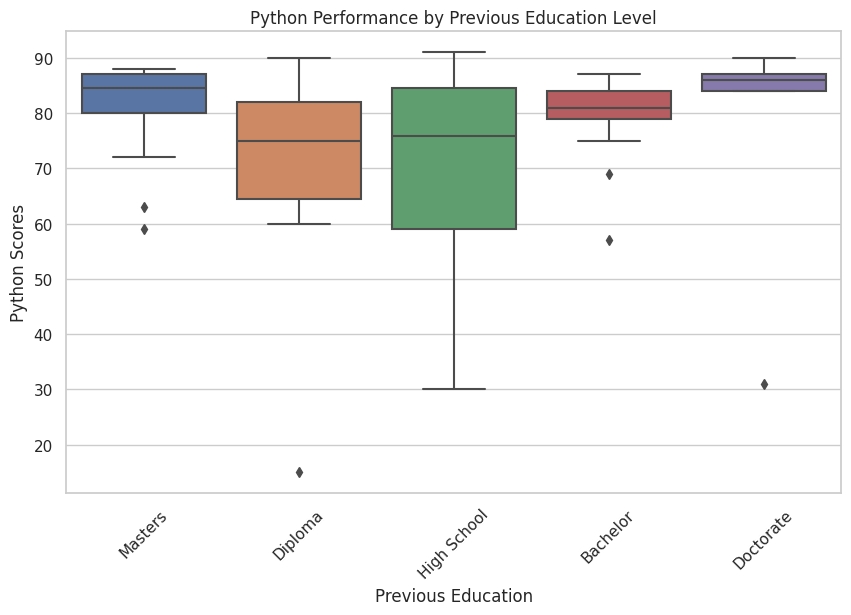

Average (Mean) Python score for each education level
prevEducation
Bachelor      80.00
Diploma       70.08
Doctorate     75.60
High School   69.62
Masters       81.19
Name: Python, dtype: float64
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
Median Python score for each education level
prevEducation
Bachelor      81.00
Diploma       75.00
Doctorate     86.00
High School   75.85
Masters       84.50
Name: Python, dtype: float64


In [28]:
# Box plot to visualize Python performance by education level
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df['prevEducation'], y=cleaned_df['Python'])
plt.title("Python Performance by Previous Education Level")
plt.xlabel("Previous Education")
plt.ylabel("Python Scores")
plt.xticks(rotation=45)
plt.show()

# Calculate the average (Mean) Python score for each education level
education_python_avg = cleaned_df.groupby('prevEducation')['Python'].mean()
print('Average (Mean) Python score for each education level')
print(education_python_avg)

print(' * '*20)
# Calculate the Median Python score for each education level
education_python_median = cleaned_df.groupby('prevEducation')['Python'].median()
print('Median Python score for each education level')
print(education_python_median)


The box plot above show the distribution of Python scores based on previous education levels. Here's an interpretation of the results, as well as insights from the calculated averages:

#### Interpretation of the boxplots and the corresponding data:


1. **Master's Degree Students:**
   - **Median Score:** 84.50
   - **Mean Score:** 81.19
   - The boxplot shows a high median score of around 84.5, with the middle 50% of students (the interquartile range) scoring between approximately 82 and 87. There are a few outliers on the lower end, but overall, the scores are tightly clustered, indicating strong and consistent Python performance among Master's degree holders.

2. **Diploma Students:**
   - **Median Score:** 75.00
   - **Mean Score:** 70.08
   - The median score for Diploma students is around 75, which is higher than their mean score of 70.08. This suggests a right-skewed distribution, where some lower-performing students pull down the average, but the majority are doing relatively well. There are also a few outliers pulling the minimum score downward.

3. **High School Students:**
   - **Median Score:** 75.85
   - **Mean Score:** 69.62
   - The boxplot for High School students indicates the widest range of scores. The median is relatively high at 75.85, but the mean score of 69.62 shows that there are some significantly lower-scoring students in this group. The large interquartile range suggests varying levels of Python proficiency among students with a high school education background. Outliers can be seen at the bottom, representing the few very low scores.

4. **Bachelor's Degree Students:**
   - **Median Score:** 81.00
   - **Mean Score:** 80.00
   - The boxplot for Bachelor's degree students shows a median score of 81, which is close to the mean of 80.00. This suggests that their performance is quite consistent, with minimal skew in the distribution of scores. The interquartile range is also fairly small, showing less variation compared to other groups like High School and Diploma.

5. **Doctorate Students:**
   - **Median Score:** 86.00
   - **Mean Score:** 75.60
   - Doctorate students have the highest **median score** at 86, but the mean is much lower at 75.60. This indicates a left-skewed distribution where a few low-performing students bring down the average, even though the majority perform very well. The boxplot supports this observation, as the scores appear tightly clustered at the higher end, with a few outliers lowering the mean.

### **Summary of Key Observations:**
- **Master’s** and **Bachelor’s** degree holders perform consistently well, with similar median scores around 81-84 and smaller variations in their results.
- **Diploma** and **High School** students exhibit greater variability in their Python scores, as indicated by the wider interquartile range and the presence of low outliers.
- **Doctorate** students have a high median score of 86 but a lower mean, due to a few students pulling down the average.
  
In summary, the data shows a general trend where higher education levels correlate with stronger Python performance, but there is significant variability within groups, particularly for high school and diploma holders.

### **Question 3:**
**Are there any significant gender differences in Python performance or study hours?**

Here, we compare the average Python scores and study hours between male and female students using descriptive statistics and visualizations.

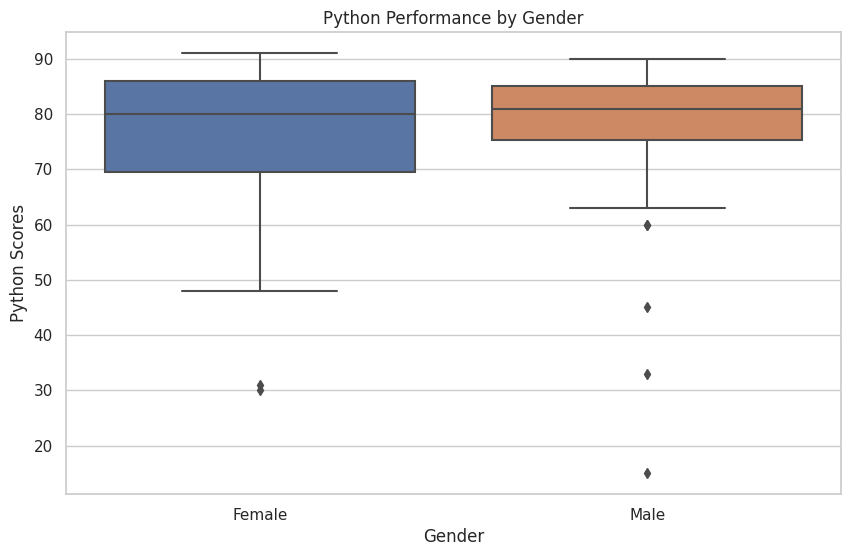

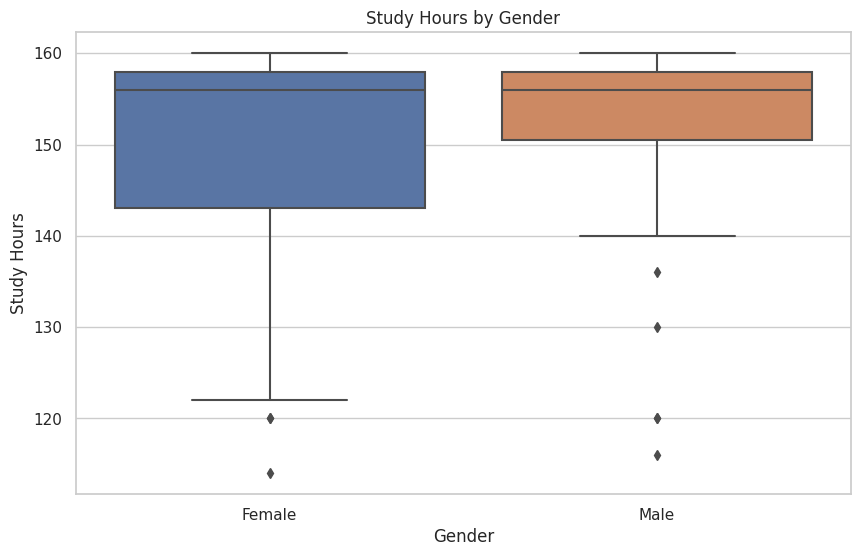

In [29]:
# Box plot to visualize Python scores by gender
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df['gender'], y=cleaned_df['Python'])
plt.title("Python Performance by Gender")
plt.xlabel("Gender")
plt.ylabel("Python Scores")
plt.show()

# Box plot to visualize study hours by gender
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df['gender'], y=cleaned_df['studyHOURS'])
plt.title("Study Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Study Hours")
plt.show()

#### Mean comparison for Python and study hours across the Gender

In [30]:

# Mean comparison for Python and study hours
gender_python_avg = cleaned_df.groupby('gender')[['Python', 'studyHOURS']].mean()
gender_python_avg

,Python,studyHOURS
gender,,
Female,76.00,148.98
Male,75.67,150.65


#### Median comparison for Python and study hours across the Gender

In [31]:
# Median comparison for Python and study hours
gender_python_median = cleaned_df.groupby('gender')[['Python', 'studyHOURS']].median()
gender_python_median

,Python,studyHOURS
gender,,
Female,80.00,156.00
Male,81.00,156.00


##### **Python Performance by Gender:**

- **Females:**
  - **Mean Python Score:** 76.00
  - **Median Python Score:** 80.00
  - The boxplot shows a **median score of 80**, but the **mean score is 76**, indicating that although most female students tend to score relatively well (around 80), there are some lower-scoring outliers pulling the overall average down.
  - The interquartile range (IQR) suggests that 50% of the female students score between roughly **70** and **85**, with outliers below **50**, contributing to the lower mean.

- **Males:**
  - **Mean Python Score:** 75.67
  - **Median Python Score:** 81.00
  - Male students have a slightly **higher median Python score** of 81, but their mean score is **slightly lower at 75.67**. This suggests that a few lower-scoring male students are pulling the average down, similar to females.
  - The IQR for males is slightly tighter compared to females, indicating that most male students are clustered more closely around the median score, with fewer extreme outliers compared to females.

##### **Study Hours by Gender:**

- **Females:**
  - **Mean Study Hours:** 148.98
  - **Median Study Hours:** 156.00
  - Female students, on average, study **slightly fewer hours** (mean = 148.98) compared to the median study time of **156.00 hours**. This suggests that the majority of female students are consistent with their study hours, but there are some students who study much less, lowering the overall mean.
  - The boxplot shows that 50% of the students fall between **150** and **160 study hours**, with outliers pulling the lower end down significantly to around **120 hours**.

- **Males:**
  - **Mean Study Hours:** 150.65
  - **Median Study Hours:** 156.00
  - Male students have a **mean study time of 150.65 hours**, which is slightly closer to the **median of 156 hours**. This indicates more consistent study habits, with fewer students deviating from the group. The IQR is similar to that of females, indicating that the middle 50% of male students study between approximately **150** and **160 hours**.
  - The male students’ boxplot also shows some lower outliers, but overall, there is less variability in their study hours compared to females.

##### **Key Observations and Insights:**

1. **Python Scores:**
   - While male students have a slightly **higher median Python score** (81 vs. 80 for females), the **mean Python scores** are nearly identical (76.00 for females and 75.67 for males).
   - The **variation** in scores is greater for females, as seen by the spread of the boxplot and lower outliers. Males, on the other hand, tend to perform more consistently, with fewer extreme scores pulling down their average.

2. **Study Hours:**
   - Both male and female students have the same **median study time** of **156 hours**.
   - Female students, however, exhibit a wider range of study habits, with the mean study time of **148.98 hours** being slightly lower than that of males (**150.65 hours**). This suggests that while some females study less, the majority still spend substantial hours, which is consistent with their median study time.

3. **Study Hours vs. Python Scores:**
   - Despite males and females having similar study habits (as reflected by median study hours), their performance in Python is also similar, with very close mean scores. However, the **wider variability** in study habits among females might contribute to the greater spread in their Python performance, as seen in the Python score boxplot.

#### **Summary of Key Changes:**
- We can conclude that while males and females have very similar Python performance and study habits on average, female students display greater variability in both, as indicated by the spread in the boxplots.

### **Question 4:**
**What is the distribution of entry exam scores across different residences, and does the residence type (e.g., private, BI Residence, Sognsvann) affect performance in Python?**

We can explore the distribution of entry exam scores across different residences and see if there's any notable trend in Python performance by residence.

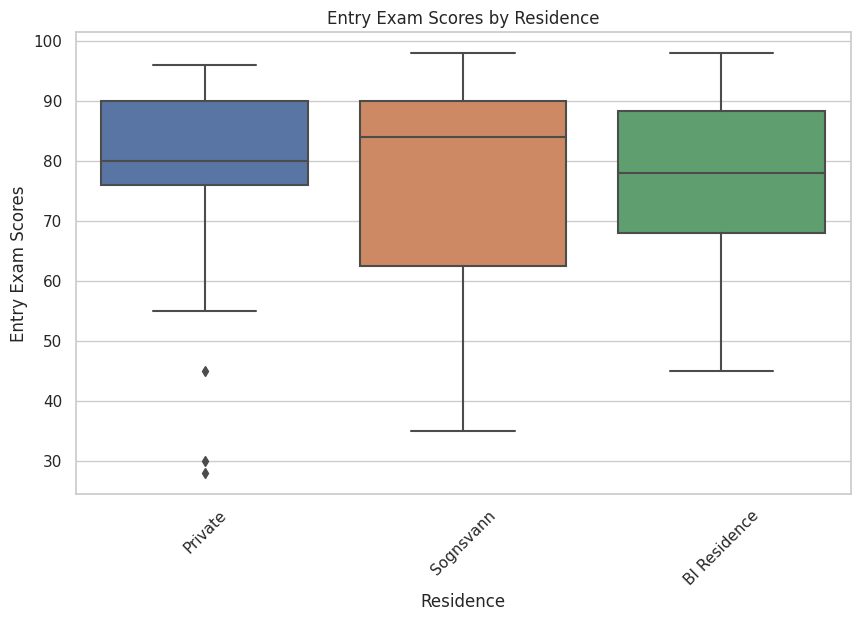

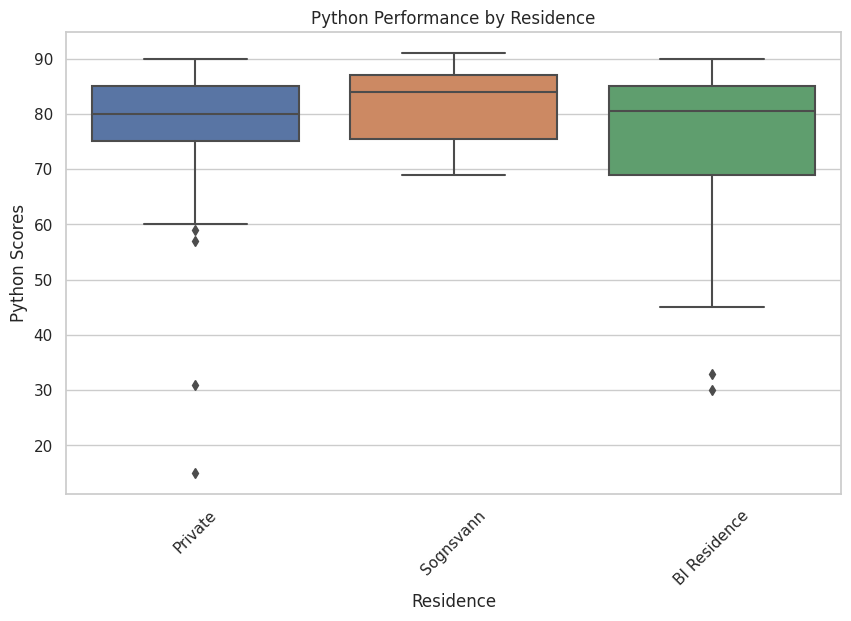

In [32]:
# Box plot to visualize entry exam scores by residence
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df['residence'], y=cleaned_df['entryEXAM'])
plt.title("Entry Exam Scores by Residence")
plt.xlabel("Residence")
plt.ylabel("Entry Exam Scores")
plt.xticks(rotation=45)
plt.show()

# Box plot to visualize Python performance by residence
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df['residence'], y=cleaned_df['Python'])
plt.title("Python Performance by Residence")
plt.xlabel("Residence")
plt.ylabel("Python Scores")
plt.xticks(rotation=45)
plt.show()

#### Answering Question 4 using a summary of various statistical measures
**Descriptive Statistics for Entry Exam Scores by Residence:**

In [33]:
# Get descriptive statistics for entry exam scores by residence
entry_exam_desc = cleaned_df.groupby('residence')['entryEXAM'].describe()
entry_exam_desc


,count,mean,std,min,25%,50%,75%,max
residence,,,,,,,,
BI Residence,32.00,75.97,14.37,45.00,68.00,78.00,88.25,98.00
Private,33.00,78.30,16.71,28.00,76.00,80.00,90.00,96.00
Sognsvann,12.00,74.58,21.61,35.00,62.50,84.00,90.00,98.00


**Descriptive Statistics for Python Scores by Residence**

In [34]:
# Get descriptive statistics for Python performance by residence
python_desc = cleaned_df.groupby('residence')['Python'].describe()
python_desc

,count,mean,std,min,25%,50%,75%,max
residence,,,,,,,,
BI Residence,32.00,74.31,16.19,30.00,69.00,80.50,85.00,90.00
Private,33.00,75.33,16.25,15.00,75.00,80.00,85.00,90.00
Sognsvann,12.00,81.40,7.01,69.00,75.39,84.00,87.00,91.00


#### Interpretation of the Descriptive Statistics

The descriptive statistics for the **Entry Exam Scores** and **Python Scores** by residence provide insights into the academic performance of learners based on their living arrangements and highlight potential correlations between early assessment and later academic outcomes.

##### 1. **Descriptive Statistics for Entry Exam Scores by Residence:**

- **Mean Scores:** The average entry exam scores are relatively high across all residences, with Private having the highest mean (78.30) followed by BI Residence (75.97) and Sognsvann (74.58). This could indicate that students in private housing may have better preparation or support systems prior to taking the exam.
  
- **Standard Deviation:** The standard deviations vary, with Sognsvann showing the highest (21.61). This indicates greater variability in the scores, suggesting that while some students excel, others may have struggled significantly.

- **Min and Max Scores:** The minimum score for Private (28.00) raises concerns about the preparedness of some students in that group, while the maximum scores are quite high, indicating a good potential for performance.

##### 2. **Descriptive Statistics for Python Scores by Residence:**

- **Mean Scores:** The Python scores show that Sognsvann students outperform the others with a mean score of 81.40, which could suggest effective learning environments or instructional support during the semester.

- **Correlation Analysis:** The correlation between entry exam scores and Python scores can be inferred here. While both statistics provide insight into student performance, it's noteworthy that the **entry exam** scores are determined prior to admission, while the **Python scores** reflect the cumulative performance at the end of the semester. A strong initial performance in the entry exam (especially for the Private residence) may not directly translate to the same level of success in Python courses, as the average scores indicate variability.

#### Conclusion

The analysis reveals insights into the academic preparedness and performance of students based on their residences. The relatively high entry exam scores may indicate effective admission processes, but the later Python scores highlight that ongoing academic support and engagement are crucial for student success. Further investigation into teaching methods, curriculum effectiveness, and support systems in different residences could provide valuable insights into enhancing overall student performance.

This analytical approach allows for identifying areas for improvement and tailoring educational strategies to address observed disparities among residences.

### **Question 5:**
**How does age influence performance in Python?**

We will examine whether there is any trend between age and Python scores by plotting a scatter plot and calculating the correlation between the two variables.


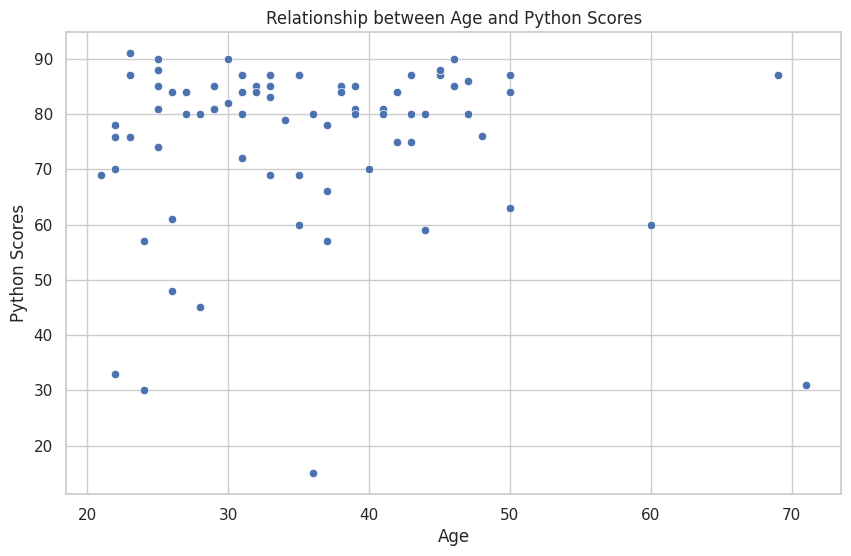

Correlation between Age and Python scores: -0.014


In [35]:
# Scatter plot to show relationship between age and Python scores
plt.figure(figsize=(10,6))
sns.scatterplot(x=cleaned_df['Age'], y=cleaned_df['Python'])
plt.title("Relationship between Age and Python Scores")
plt.xlabel("Age")
plt.ylabel("Python Scores")
plt.show()

# Calculate the correlation between Age and Python scores
age_python_correlation = cleaned_df['Age'].corr(cleaned_df['Python'])

# Print the result formatted to 3 decimal places
print(f'Correlation between Age and Python scores: {age_python_correlation:.3f}')


The correlation coefficient between age and Python scores is approximately **-0.014**, suggesting a negligible negative relationship. This means that as age increases, there is almost no change in Python scores, which could imply that age does not significantly affect the performance of learners in Python programming.

### Interpretation of the Correlation
1. **Negligible Correlation:** The value of -0.014 indicates a very weak negative correlation, meaning that age is unlikely to be a determining factor in Python scores among the students in your dataset.
  
2. **Age Factor in Learning:** Research indicates that while age can play a role in cognitive development and learning styles, other factors like prior experience, motivation, and the learning environment often have a more substantial impact on performance in subjects like programming. Younger students may be more adept at certain learning tasks due to familiarity with technology, while older students might possess better problem-solving skills or life experiences that can enhance their understanding.

3. **Diverse Learning Backgrounds:** The diverse backgrounds and previous educational experiences of students can also play a more critical role than age alone. Therefore, while age is a factor in educational settings, its impact on programming skills like Python is minimal when controlling for other variables.

### Further Considerations
To better understand how age affects Python scores, we might need to consider:
- **Regression Analysis:** Conducting a regression analysis to identify the impact of age while controlling for other variables such as previous education or study habits.
- **Age Groups:** Analyzing Python scores across different age groups to see if patterns emerge that may not be evident when considering age as a continuous variable.

In summary, while age appears to have a minimal effect on Python scores based on the correlation from the dataset, it's essential to explore other influencing factors for a more comprehensive understanding of student performance in programming. 

#### Scientific Article to support the above observation

Jamal Kaksouri’s article, *“Age and College Degree: Do They Matter for Learning Programming?”* (2023), explores the relevance of age and formal education in the journey of learning programming. He emphasizes that neither age nor a college degree is a prerequisite for becoming a successful programmer. Citing notable examples like **Bill Gates** and **Mark Zuckerberg**, Kaksouri demonstrates that many influential tech leaders have thrived without completing formal degrees in computer science.

The article also highlights **Masako Wakamiya**, who began learning programming at the age of 81 and became an advocate for senior citizens in tech, proving that age is not a limiting factor. This aligns with educational psychology research, such as **Carol Dweck’s** work on the "growth mindset," which shows that abilities can develop through dedication and hard work. Kaksouri also references the growing trend of self-taught programmers who leverage online resources and coding bootcamps to gain skills, emphasizing how passion and commitment are often more important than formal credentials.

This discussion reflects broader themes in programming education and the tech industry, where non-traditional learning paths, such as online courses and self-directed study, are increasingly common. In conclusion, the article stresses that success in programming is more about dedication and continuous learning than age or formal education.

# Step 7: Deeper Exploration of a Feature on a Target

## How does Age affect the ability to learn Programming (Age and Python)

In this section, we will explore the relationship between age and Python scores by applying several transformations and visualizations. The following steps outline the transformations we will undertake to understand this relationship:

1. **Original Relationship**: 
   - **Scatter Plot**: Visualize the initial relationship between age and Python scores using a scatter plot.
   - **Correlation Coefficient**: Calculate the Pearson correlation coefficient to quantify the strength of the linear relationship.

2. **Polynomial Transformation**:
   - **Create Polynomial Features**: Generate polynomial features of age (e.g., age squared) to capture non-linear relationships.
   - **Scatter Plot**: Plot the relationship between the polynomial features and Python scores.
   - **Correlation Coefficient**: Recalculate the correlation for the polynomial features.

3. **Log Transformation**:
   - **Log Transform Age**: Apply a logarithmic transformation to the age variable to address potential skewness.
   - **Scatter Plot**: Visualize the log-transformed age against Python scores.
   - **Correlation Coefficient**: Calculate the correlation with the log-transformed age.

4. **Binning Age**:
   - **Create Age Bins**: Group ages into bins (e.g., 20-30, 31-40) to analyze the average Python score within each age group.
   - **Bar Plot**: Display a bar plot showing the average Python scores for each age bin.

5. **Interaction with Other Features**:
   - **Feature Interaction**: Investigate if the interaction between age and other features (e.g., study hours) influences Python scores.
   - **Scatter Plot**: Create scatter plots for these interactions and calculate the correlation.

6. **Summary Statistics**:
   - **Descriptive Statistics**: Calculate summary statistics for age and Python scores to provide a comprehensive view of the data.

By undertaking these transformations, we aim to uncover the underlying patterns and relationships between age and Python scores. Each analysis will provide insights into how age influences the ability to learn programming.


### 1. Original Relationship

To begin our exploration, we first examined the relationship between age and Python scores. This initial analysis revealed a correlation coefficient of **-0.014**, indicating a very weak negative relationship between age and Python scores. This surprising result motivated us to delve deeper into the data to understand the underlying dynamics more thoroughly.

Great! Here’s how you can structure the second section of your Quarto document, focusing on introducing a new feature to capture non-linear relationships, such as the square of age. This allows us to investigate whether age has a diminishing effect on programming ability after a certain point.


### 2. Introducing a Quadratic Feature (Age Squared)

To explore the possibility of a non-linear relationship between age and Python scores, we can create a new feature by squaring the age variable. This transformation allows us to examine whether there is a point after which the ability to learn programming diminishes as age increases.

#### Creating the Quadratic Feature

We will create a new column in the dataset, `Age_squared`, which will be the square of the `Age` column. This new feature will help us understand if the relationship between age and Python scores is better captured by a quadratic function.




In [36]:
# Create a new column for age squared
cleaned_df['Age_squared'] = cleaned_df['Age'] ** 2
cleaned_df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Age_squared
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.00,55,1936
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.00,75,3600
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.00,50,625
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40,High School,120,75.85,44,484
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65,High School,122,91.00,80,529


**Next, we will visualize the relationship between `age_squared` and Python scores using a scatter plot. This will help us identify any potential non-linear patterns in the data.**

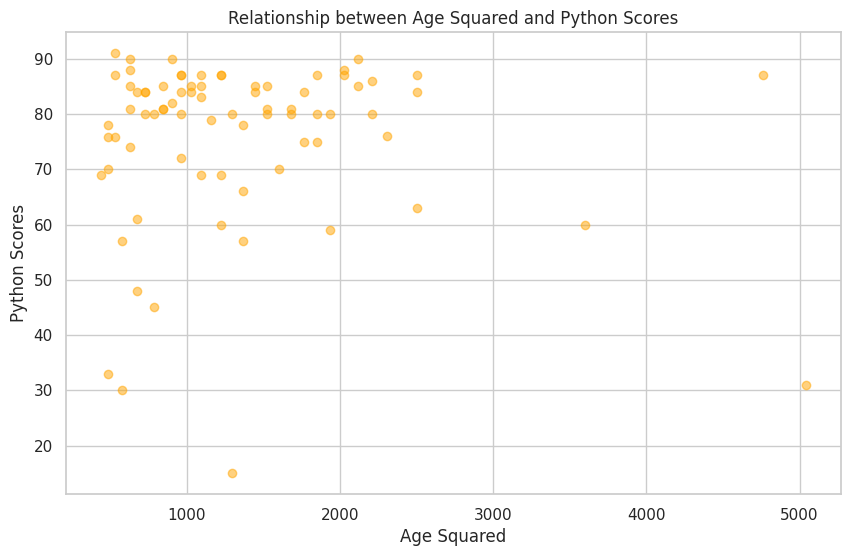

In [37]:
# Scatter plot for age squared
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Age_squared'], cleaned_df['Python'], color='orange', alpha=0.5)
plt.title('Relationship between Age Squared and Python Scores')
plt.xlabel('Age Squared')
plt.ylabel('Python Scores')
plt.grid(True)
plt.show()

**We will also calculate the correlation coefficient between `Age_squared` and Python scores to quantify the strength and direction of this new relationship.**


In [38]:
### Correlation Coefficient
correlation_squared = cleaned_df['Age_squared'].corr(cleaned_df['Python'])

# Print the result formatted to 3 decimal places
print(f'Correlation between Age squared and Python scores: {correlation_squared:.3f}')

Correlation between Age squared and Python scores: -0.068


The correlation coefficient of **-0.068** between age squared and Python scores indicates a very weak negative relationship. This suggests that, when considering the quadratic transformation of age, there isn't a significant relationship between age squared and programming ability as measured by Python scores in this dataset.

##### Interpretation:
- **Weak Negative Correlation**: The negative value implies that as the square of age increases, Python scores tend to decrease slightly, but the correlation is close to zero, indicating that this trend is not strong or reliable.
- **Diminishing Returns**: While we initially hypothesized that age might influence programming ability, the addition of the age squared feature does not provide evidence of a diminishing return on programming ability as individuals get older in this context.
- **Further Exploration Needed**: This outcome suggests that the relationship between age and Python scores might not be captured adequately by either a linear or quadratic model. It may be worthwhile to explore other transformations, interactions, or additional features to gain a better understanding of how age impacts programming skills.

### 3. Logarithmic Transformation of Age

To further investigate the relationship between age and Python scores, we can apply a logarithmic transformation to the age variable. This transformation helps us understand whether the effects of age on programming ability diminish as individuals grow older, particularly in a non-linear fashion.

#### Creating the Logarithmic Feature

We will create a new column in the dataset called `log_age`, which will represent the natural logarithm of the age variable. This transformation allows us to model diminishing returns more effectively.

Next, we will visualize the relationship between the logarithmic age and Python scores using a scatter plot. This will help us identify any potential non-linear patterns.



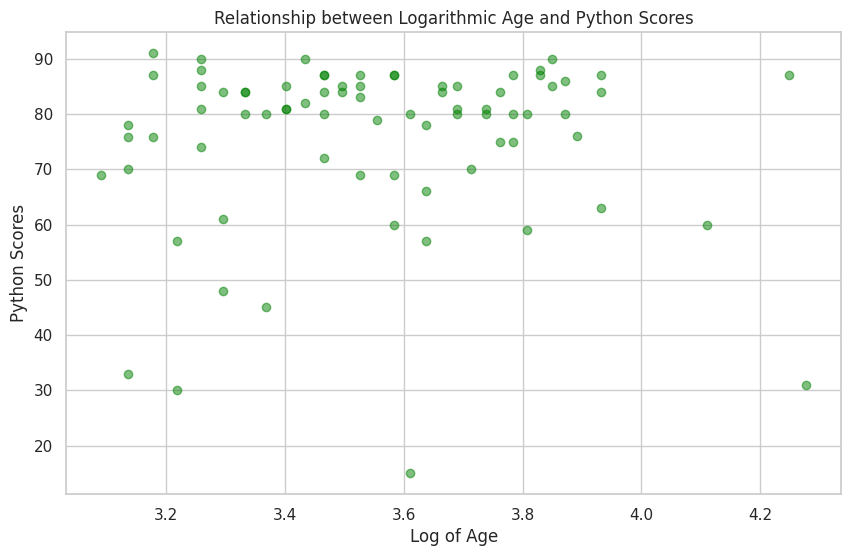

In [39]:
# Create a new column for the logarithm of age
cleaned_df['log_age'] = np.log(cleaned_df['Age'] + 1) #Add one to cater for age<=0

### Scatter Plot

# Scatter plot for logarithmic age
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['log_age'], cleaned_df['Python'], color='green', alpha=0.5)
plt.title('Relationship between Logarithmic Age and Python Scores')
plt.xlabel('Log of Age')
plt.ylabel('Python Scores')
plt.grid(True)
plt.show()

#### Correlation Coefficient

We will also calculate the correlation coefficient between `log_age` and Python scores to quantify the strength and direction of this new relationship.

In [40]:
correlation_log = cleaned_df['log_age'].corr(cleaned_df['Python'])

# Print the result formatted to 3 decimal places
print(f'Correlation between log_age and Python scores: {correlation_log:.3f}')

Correlation between log_age and Python scores: 0.035


The correlation coefficient of **0.035** between `log_age` and Python scores indicates a very weak positive relationship. Here’s a breakdown of what this means:

#### Interpretation:
- **Weak Positive Correlation**: A correlation of 0.035 suggests that there is almost no relationship between the logarithm of age and Python scores. As `log_age` increases, Python scores do not show a consistent upward trend.
- **Limited Impact of Age**: This weak correlation further supports the idea that age, whether measured linearly, quadratically, or logarithmically, does not have a strong influence on programming ability within the context of this dataset.
- **Diminishing Returns Still Uncertain**: While we were exploring the potential for diminishing returns on programming skills with increasing age, the logarithmic transformation has not yielded any significant insights regarding this hypothesis.

#### Conclusion:
The results indicate that the relationship between age (even in its logarithmic form) and Python programming scores is minimal, suggesting that factors beyond age may play a more crucial role in determining programming ability. This outcome may prompt further investigation into other variables or combinations of variables that could better explain variations in Python scores.

### 4. Interaction Between Age and Study/Entrance Exam Scores

To delve deeper into the relationship between age and Python scores, we can examine whether the impact of age on programming ability varies depending on study hours and entrance exam scores. This analysis involves creating interaction terms between age and these variables.

#### Creating the Interaction Features

We will create two new columns in the dataset: 
- `age_study_interaction`, which is the product of `Age` and `studyHOURS`.
- `age_entrance_interaction`, which is the product of `Age` and `entryEXAM`.


In [41]:
# Create the interaction terms
cleaned_df['age_study_interaction'] = cleaned_df['Age'] * cleaned_df['studyHOURS']
cleaned_df['age_entrance_interaction'] = cleaned_df['Age'] * cleaned_df['entryEXAM']

#### Scatter Plots and Correlation Coefficients

Next, we will visualize the relationships between the interaction terms and Python scores using scatter plots and calculate the corresponding correlation coefficients.

##### 1. Age-Study Interaction

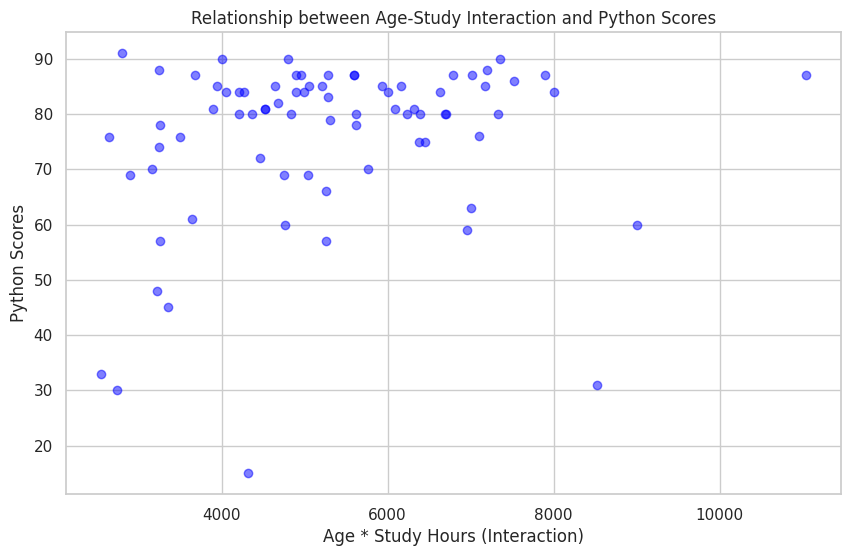



Correlation between age_study_interaction and Python scores: 0.202
Correlation between study hours and Python scores: 0.784


In [42]:
# Scatter plot for the age-study interaction
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['age_study_interaction'], cleaned_df['Python'], color='blue', alpha=0.5)
plt.title('Relationship between Age-Study Interaction and Python Scores')
plt.xlabel('Age * Study Hours (Interaction)')
plt.ylabel('Python Scores')
plt.grid(True)
plt.show()

print('\n')
correlation_age_study = cleaned_df['age_study_interaction'].corr(cleaned_df['Python'])
# Print the result formatted to 3 decimal places
print(f'Correlation between age_study_interaction and Python scores: {correlation_age_study:.3f}')

# Independent Study Hours
correlation_study_hours = cleaned_df['studyHOURS'].corr(cleaned_df['Python'])
print(f'Correlation between study hours and Python scores: {correlation_study_hours:.3f}')

**Comments on Correlation Results**

1. **Correlation between Age-Study Interaction and Python Scores: 0.202**
   - This correlation suggests a moderate positive relationship between the interaction of age and study hours with Python scores. It indicates that as both age and study hours increase, Python scores tend to increase as well. However, the correlation is not very strong, meaning that age alone may not significantly influence the relationship with programming skills when combined with study hours. It may imply that while older students may benefit from additional study hours, other factors might also be influencing their performance.

2. **Correlation between Study Hours and Python Scores: 0.784**
   - This correlation indicates a strong positive relationship between study hours and Python scores. This suggests that, generally, students who spend more time studying tend to perform better in Python. It underscores the importance of dedicated study time in acquiring programming skills and could imply that enhancing study habits and providing more resources for learning could significantly improve performance in Python.

### Conclusion
The results highlight the significant impact of study hours on Python performance, while the age interaction term suggests a more nuanced relationship. This indicates the need for targeted interventions that consider both study habits and student demographics to optimize programming skill acquisition. 


##### 2. Age-Entrance Interaction

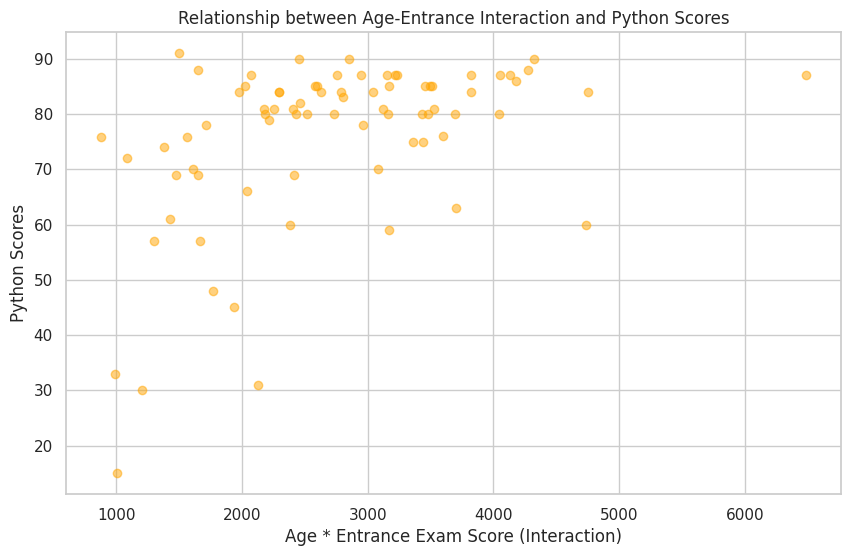



Correlation between age_entrance_interaction and Python scores: 0.450
Correlation between entrance exam score and Python scores: 0.759


In [43]:
# Scatter plot for the age-entrance interaction
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['age_entrance_interaction'], cleaned_df['Python'], color='orange', alpha=0.5)
plt.title('Relationship between Age-Entrance Interaction and Python Scores')
plt.xlabel('Age * Entrance Exam Score (Interaction)')
plt.ylabel('Python Scores')
plt.grid(True)
plt.show()


print('\n')
correlation_age_entrance = cleaned_df['age_entrance_interaction'].corr(cleaned_df['Python'])
# Print the result formatted to 3 decimal places
print(f'Correlation between age_entrance_interaction and Python scores: {correlation_age_entrance:.3f}')

# Independent Entrace Score
correlation_entry_exam = cleaned_df['entryEXAM'].corr(cleaned_df['Python'])
print(f'Correlation between entrance exam score and Python scores: {correlation_entry_exam:.3f}')

**Comment**


The correlation between the `age_entrance_interaction` and Python scores is **0.450**, indicating a moderate positive relationship. This suggests that as age increases, the combined effect of age and entrance exam scores positively influences Python performance, but the relationship is not very strong. 

In contrast, the correlation between the entrance exam score and Python scores is significantly stronger at **0.759**. This indicates a strong positive relationship, suggesting that higher entrance exam scores are associated with better Python performance. This strong correlation highlights the importance of initial academic performance in predicting success in programming skills.

Overall, while age does seem to play a role in conjunction with entrance exam scores, the direct influence of entrance exam scores on Python performance appears to be much more substantial.

### 5. Binning Age to Analyze Python Scores

To further investigate how age affects Python scores, we will bin the ages into specific categories. This approach will help us understand how different age groups perform in Python programming.

#### Step 1: Define Age Bins

We will define age bins and create a new column that assigns each student to an age group. Here’s an example of how we might categorize age:

- 18-24: Young Adults
- 25-34: Adults
- 35-44: Middle-Aged
- 45-54: Older Adults
- 55 and above: Seniors

In [44]:
### Code to Create Age Bins

# Define the bins and labels
bins = [17, 24, 34, 44, 54, 100]  # Adjusting the upper limit to cover all ages
labels = ['18-24', '25-34', '35-44', '45-54', '55+']

# Create a new column for age groups
cleaned_df['age_group'] = pd.cut(cleaned_df['Age'], bins=bins, labels=labels)
cleaned_df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Age_squared,log_age,age_study_interaction,age_entrance_interaction,age_group
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.00,55,1936,3.81,6952,3168,35-44
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.00,75,3600,4.11,9000,4740,55+
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.00,50,625,3.26,3250,1375,25-34
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40,High School,120,75.85,44,484,3.14,2640,880,18-24
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65,High School,122,91.00,80,529,3.18,2806,1495,18-24


#### Step 2: Analyze Python Scores by Age Group

We can now analyze the average Python scores within each age group.

In [45]:
# Calculate average Python scores for each age group
age_group_performance = cleaned_df.groupby('age_group', observed=True)['Python'].mean().reset_index()
age_group_performance


,age_group,Python
0,18-24,66.67
1,25-34,79.50
2,35-44,74.38
3,45-54,82.60
4,55+,59.33


#### Step 3: Visualization

**Bar Plot of Average Python Scores by Age Group**

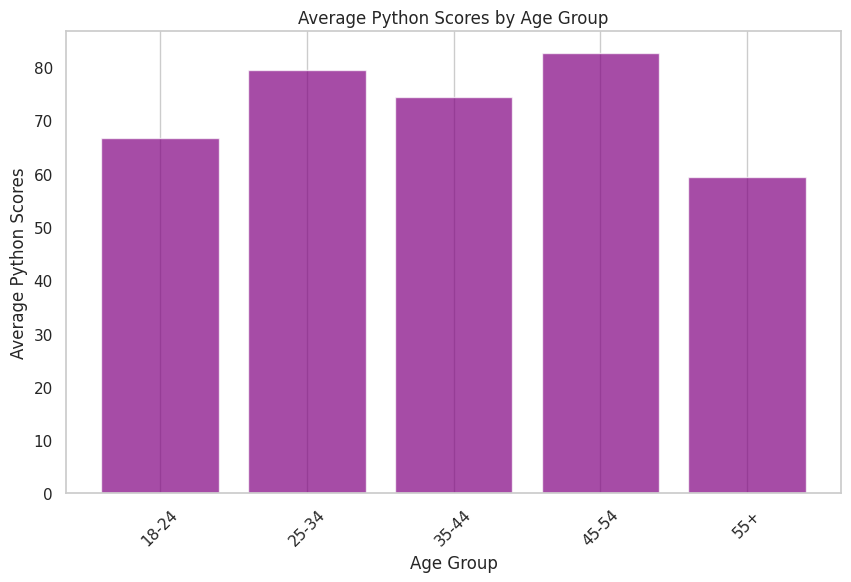

In [46]:
# Bar plot for average Python scores by age group
plt.figure(figsize=(10, 6))
plt.bar(age_group_performance['age_group'], age_group_performance['Python'], color='purple', alpha=0.7)
plt.title('Average Python Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Python Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Step 4: Correlation Analysis

Additionally, we can calculate the correlation between age groups and Python scores to see if there are any statistically significant trends.


In [47]:
from sklearn.preprocessing import OneHotEncoder

# Extract categorical columns from the dataframe
# Here we extract the categorical columns we want to work with
categorical_columns = ['age_group']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(cleaned_df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
# We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([cleaned_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
df_encoded.head(10)




,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Age_squared,log_age,age_study_interaction,age_entrance_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55+
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.00,55,1936,3.81,6952,3168,0.00,0.00,1.00,0.00,0.00
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.00,75,3600,4.11,9000,4740,0.00,0.00,0.00,0.00,1.00
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.00,50,625,3.26,3250,1375,0.00,1.00,0.00,0.00,0.00
3,Shoni,Hlongwane,22,Female,RSA,Sognsvann,40,High School,120,75.85,44,484,3.14,2640,880,1.00,0.00,0.00,0.00,0.00
4,Maria,Kedibone,23,Female,RSA,Sognsvann,65,High School,122,91.00,80,529,3.18,2806,1495,1.00,0.00,0.00,0.00,0.00
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.00,59,625,3.26,3250,1650,0.00,1.00,0.00,0.00,0.00
6,Ole,Johansen,27,Male,Norway,BI Residence,90,Bachelor,156,80.00,91,729,3.33,4212,2430,0.00,1.00,0.00,0.00,0.00
7,Lars,Olsen,29,Male,Norway,BI Residence,89,Bachelor,160,85.00,60,841,3.40,4640,2581,0.00,1.00,0.00,0.00,0.00
8,Bjørn,Larsen,31,Male,Norway,BI Residence,88,Bachelor,156,80.00,89,961,3.47,4836,2728,0.00,1.00,0.00,0.00,0.00
9,Sofie,Jensen,33,Female,Denmark,BI Residence,85,Bachelor,160,83.00,90,1089,3.53,5280,2805,0.00,1.00,0.00,0.00,0.00


In [48]:
# one_hot_df contains the one-hot encoded columns
encoded_cols = one_hot_df.columns.tolist()
# Adding Python scores to the analysis
analysis_cols = encoded_cols + ['Python']

# Create a DataFrame with only the necessary columns
analysis_df = df_encoded[analysis_cols]

# Calculate the correlation matrix
age_bins_corr = analysis_df.corr()

# Display the correlation matrix
print("Correlation matrix for one-hot encoded age groups and Python scores:")
age_bins_corr


Correlation matrix for one-hot encoded age groups and Python scores:


,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55+,Python
age_group_18-24,1.00,-0.31,-0.26,-0.15,-0.08,-0.23
age_group_25-34,-0.31,1.00,-0.54,-0.31,-0.16,0.19
age_group_35-44,-0.26,-0.54,1.00,-0.26,-0.14,-0.07
age_group_45-54,-0.15,-0.31,-0.26,1.00,-0.08,0.17
age_group_55+,-0.08,-0.16,-0.14,-0.08,1.00,-0.22
Python,-0.23,0.19,-0.07,0.17,-0.22,1.00




#### Correlation Analysis

1. **Age Group 18-24:**
   - **Correlation with Python:** -0.23
   - This indicates a weak negative correlation with Python scores. As individuals fall into the 18-24 age group, their Python scores slightly decrease, suggesting that younger learners in this group may not perform as well as other age groups.

2. **Age Group 25-34:**
   - **Correlation with Python:** 0.19
   - This group shows a weak positive correlation with Python scores. It suggests that individuals in this age range tend to perform slightly better in Python, indicating that younger adults may have a better grasp of programming concepts.

3. **Age Group 35-44:**
   - **Correlation with Python:** -0.07
   - The correlation here is very close to zero, indicating virtually no relationship between this age group and Python scores. Performance in Python does not significantly differ based on being in this age group.

4. **Age Group 45-54:**
   - **Correlation with Python:** 0.17
   - This age group has a weak positive correlation with Python scores. It implies that individuals in this group may perform slightly better in Python compared to those in other age ranges, particularly those younger than them.

5. **Age Group 55+:**
   - **Correlation with Python:** -0.22
   - This indicates a weak negative correlation. Older individuals (55 and above) tend to have lower Python scores, which may reflect challenges in adapting to new technologies or programming concepts compared to younger age groups.

#### Summary of Insights
- **General Trend:** There is a tendency for middle-aged groups (25-34 and 45-54) to have better performance in Python, while younger (18-24) and older individuals (55+) show a decrease in performance.
- **Weak Correlations:** All correlations are relatively weak, suggesting that age alone does not have a strong influence on Python performance. Other factors, such as educational background, prior programming experience, and study habits, might play a more significant role in affecting scores.
- **Recommendation for Further Study:** It would be beneficial to explore additional variables such as study hours, prior programming knowledge, or motivation factors that could provide more context around these correlations.


# Machine learning

In a professional machine learning setting, **Problem Definition** is crucial for aligning machine learning tasks with business objectives. Based on our dataset, the goal would typically involve **predicting outcomes** or **analyzing patterns** that can drive decision-making. Here are a few **machine learning problems** we could formulate:


## Machine learning problems Based on the BI dataset

### 1. **Predicting Academic Performance**:
   - **Problem**: Predict student performance in subjects like Python and Databases (DB).
   - **Type**: Supervised Learning (Regression).
   - **Objective**: Build a model to predict students' future exam scores based on their demographic data (age, gender, country), study habits (study hours, previous education), and entry exam results. 
   - **Business Use Case**: This could help educational institutions (In this case BI) personalize learning experiences, allocate resources for struggling students, and improve overall student outcomes.

   **Target Variables**: 
   - `Python`, `DB` scores.
   
   **Features**:
   - `age`, `gender`, `country`, `study_hours`, `entry_exam`, `prevEducation`.

### 2. **Classification of Student Categories**:
   - **Problem**: Classify students into different categories based on their study patterns.
   - **Type**: Supervised Learning (Classification).
   - **Objective**: Identify which students are high achievers, average performers, or at-risk based on their background and study patterns.
   - **Business Use Case**: This can help BI provide targeted interventions, develop mentorship programs, and allocate scholarships based on identified student categories.
   
   **Target Variable**:
   - Create a label such as `performance_category` based on thresholds in `Python` or `DB` scores (e.g., high, medium, low performers).

   **Features**:
   - `age`, `study_hours`, `entry_exam`, `prevEducation`, `gender`.

### 3. **Attrition Prediction**:
   - **Problem**: Predict the likelihood of students dropping out or not completing their studies.
   - **Type**: Supervised Learning (Classification).
   - **Objective**: Predict the likelihood of students dropping out based on their personal, academic, and study-related features.
   - **Business Use Case**: Institutions (In this case BI) can proactively engage with students who are at high risk of dropping out, offering additional support or mentoring to improve retention rates.
   
   **Target Variable**:
   - Label students as `attrition_risk` based on early warning signs like low `study_hours`, low `entry_exam` scores, and inconsistent past performance.

   **Features**:
   - `age`, `study_hours`, `entry_exam`, `prevEducation`, `residence`, `Python`, `DB`.

### 4. **Recommendation Systems**:
   - **Problem**: Recommend additional study materials or courses to students based on their performance and study habits.
   - **Type**: Unsupervised Learning (Clustering) or Supervised Learning (Recommendation System).
   - **Objective**: Build a recommendation system that suggests personalized learning paths, courses, or resources to students to improve their weak areas.
   - **Business Use Case**: Improve student engagement and enhance learning outcomes by providing personalized learning paths.
   
   **Features**:
   - `prevEducation`, `study_hours`, `Python`, `DB`, `entry_exam`.

### 5. **Study Hours Optimization**:
   - **Problem**: Analyze and optimize the study hours required for each student based on their past performance.
   - **Type**: Regression (Time Series or Standard Regression).
   - **Objective**: Predict the optimal number of study hours a student needs to achieve a desired performance level in Python or DB.
   - **Business Use Case**: Educational institutions (BI) could use this to recommend optimal study schedules for students, helping them to improve performance while avoiding burnout.
   
   **Target Variable**:
   - `study_hours` (optimize for desired performance levels in `Python`, `DB`).

   **Features:**
   - `prevEducation`, `entry_exam`, `Python`, `DB`.

### 6. **Gender and Performance Analysis**:
   - **Problem:** Identify performance gaps between male and female students across different countries.
   - **Type**: Descriptive Analytics (Exploratory Data Analysis, EDA).
   - **Objective:** Analyze whether there are performance differences based on gender and nationality in terms of Python and DB exam scores.
   - **Business Use Case:** This could lead to creating tailored educational programs to close performance gaps, ensuring equity in learning.
   
   **Features:**    - `gender`, `country`, `study_hours`, `Python`, `DB`.



## Chosen Problem:

**Problem**: **Predicting Student Success in Python and Databases (DB)**

**Objective**: To predict students' final combined scores in Python and DB subjects, based on their demographic background, previous education, study habits, and entry exam performance. We aim to create a `final_score` by averaging or summing their scores in Python and DB.

**Target Variable**: 
- `final_score` (calculated as the average or sum of `Python` and `DB` scores).

**Features**:
- **Demographics**: `age`, `gender`, `country`, `residence`.
- **Academic Background**: `prevEducation`, `entry_exam`.
- **Study Habits**: `study_hours`.

**Approach**:
1. **Data Preprocessing**:
   - Handle missing values, encode categorical variables, and normalize numerical features.
   - Calculate `final_score` as the average or sum of `Python` and `DB` scores.
   
2. **Feature Selection**:
   - Analyze the relationships between features and the `final_score` to identify key predictors using techniques like correlation analysis or feature importance scores from models.
   
3. **Model Building**:
   - Train a regression model (e.g., Linear Regression, Random Forest, or Gradient Boosting) to predict the `final_score` based on the selected features.
   
4. **Model Validation**:
   - Use cross-validation to ensure the model generalizes well to unseen data.
   - Evaluate the model performance using appropriate metrics such as Mean Squared Error (MSE) or R² score.

**Business Impact**:
- **Personalized Student Support**: Identify students who are at risk of low performance and provide them with targeted interventions, such as additional tutoring or study resources.
- **Resource Allocation**: Allocate educational resources more effectively by focusing on students who are predicted to benefit most from additional support.
- **Performance Monitoring**: Track student progress over time and adjust educational strategies based on data-driven insights.


### Step 1: **Data Preprocessing**

Now that we have defined the problem, target variable (`final_score`), and features, the next step is to start **data preprocessing**. This includes cleaning the data, handling missing values, creating the `final_score`, and preparing the dataset for modeling.

#### 1. **Data Cleaning**
   - **Handle Missing Values**: Decide how to handle missing values (e.g., impute with mean/median, drop rows/columns with too many missing values).
   - **Standardize Categorical Variables**: Convert categorical variables like `gender`, `country`, and `prevEducation` into numerical form using techniques like one-hot encoding or label encoding.
   - **Normalize Numerical Features**: Normalize or scale features like `age`, `study_hours`, and `entry_exam` to ensure they are on the same scale for model training.

#### 2. **Create the `final_score`**
   - Combine the `Python` and `DB` scores into a new column `final_score`. This can be done by taking their average or sum, depending on the approach chosen.

This will provide us with a **cleaned dataframe (`cleaned_df`)** ready for modeling.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset with correct encoding
url = "https://learn.walsoftcomputers.com/csv/cleaned_bi.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

# Step 1: Bin ages into categorical ranges
age_bins = [0, 25, 30, 40, 50, 100]  # Define bin boundaries
age_labels = ['UNDER_25', 'G25-29', 'G31-39', 'G41-49', '50_&_OVER']  # Corrected bin labels
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Step 2: Define the feature columns for modeling
num_cols = ['studyHOURS', 'entryEXAM']  # Numerical columns (excluding 'Age')
cat_cols = ['Age_group', 'gender', 'country', 'prevEducation', 'residence']  # Updated categorical columns

# Step 3: Build pipelines for numerical and categorical features

# Numerical pipeline (imputation and scaling)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean
    ('scaler', StandardScaler())  # Normalize numerical values
])

# Categorical pipeline (OneHotEncoding) with handle_unknown set to 'ignore'
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))  # One-hot encode and drop first to avoid multicollinearity
])

# Step 4: Use ColumnTransformer to apply transformations to the correct columns
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),  # Apply the numerical pipeline
    ('cat', cat_pipeline, cat_cols)   # Apply the categorical pipeline
])

# Step 5: Train-test split (80% train, 20% test)
X = df.drop(columns=['Python', 'DB'])  # Drop target columns
y = df[['Python', 'DB']].mean(axis=1)  # Create 'final_score'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Apply the preprocessing pipeline to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 7: Create a DataFrame from the transformed training data
processed_train_df = pd.DataFrame(
    X_train_processed, 
    columns=num_cols + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols))
)

# Add the target variable 'final_score' to the DataFrame for reference (if needed)
processed_train_df['final_score'] = y_train.values

# Display the processed training data
print("\n \n Processed Training Data:")
processed_train_df.head()


 
 Processed Training Data:


,studyHOURS,entryEXAM,Age_group_G25-29,Age_group_G31-39,Age_group_G41-49,Age_group_UNDER_25,gender_Male,country_France,country_Germany,country_Italy,...,country_Spain,country_Uganda,country_Uk,prevEducation_Diploma,prevEducation_Doctorate,prevEducation_High School,prevEducation_Masters,residence_Private,residence_Sognsvann,final_score
0,0.83,0.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,86.50
1,-1.55,-0.68,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,73.50
2,0.83,1.31,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,90.00
3,-0.76,-1.37,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,58.50
4,0.19,0.06,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,79.50


**Shape**

In [50]:
processed_train_df.shape

(61, 26)

In [51]:
# Step 8: Create a DataFrame from the transformed test data
processed_test_df = pd.DataFrame(
    X_test_processed, 
    columns=num_cols + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols))
)

# Add the target variable 'final_score' to the DataFrame for reference (if needed)
processed_test_df['final_score'] = y_test.values

# Display the processed test data
print("\n\nProcessed Test Data:")
processed_test_df.head()



Processed Test Data:


,studyHOURS,entryEXAM,Age_group_G25-29,Age_group_G31-39,Age_group_G41-49,Age_group_UNDER_25,gender_Male,country_France,country_Germany,country_Italy,...,country_Spain,country_Uganda,country_Uk,prevEducation_Diploma,prevEducation_Doctorate,prevEducation_High School,prevEducation_Masters,residence_Private,residence_Sognsvann,final_score
0,-2.19,-0.75,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,85.50
1,0.67,0.50,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,87.00
2,0.51,-0.75,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,68.50
3,0.67,-0.31,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,57.00
4,0.83,0.75,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,73.00


**Shape**

In [52]:

processed_test_df.shape

(16, 26)

Great! Now that we have the processed training and test datasets, we can move on to feature selection. This step is crucial for identifying which features (variables) contribute most significantly to predicting your target variable, `final_score`. 

### Feature Selection Approaches
Here are a few common methods for feature selection:

1. **Correlation Analysis**: Evaluate the correlation between features and the target variable to see which features are most strongly associated with it.

2. **Feature Importance from Models**: Train a model (like Random Forest) and use its built-in feature importance scores to rank the features.

3. **Recursive Feature Elimination (RFE)**: Use a model to recursively eliminate the least important features.

4. **SelectKBest**: Use statistical tests to select a specified number of top features.

#### Let's Start with Correlation Analysis
For your case, we can first calculate the correlation of all features with the `final_score` to get an initial idea of which features might be significant.

Feature Correlations with final_score:
entryEXAM                    0.79
studyHOURS                   0.79
prevEducation_Masters        0.31
Age_group_G41-49             0.22
gender_Male                  0.17
country_Germany              0.15
Age_group_G31-39             0.15
country_Nigeria              0.14
residence_Sognsvann          0.08
country_Uk                   0.07
country_Somali               0.05
residence_Private            0.05
country_Netherlands          0.03
country_Kenya               -0.00
country_Uganda              -0.04
country_Italy               -0.05
country_Spain               -0.05
prevEducation_Doctorate     -0.06
country_Norway              -0.08
Age_group_G25-29            -0.09
country_RSA                 -0.12
country_France              -0.13
prevEducation_Diploma       -0.14
Age_group_UNDER_25          -0.25
prevEducation_High School   -0.35
Name: final_score, dtype: float64


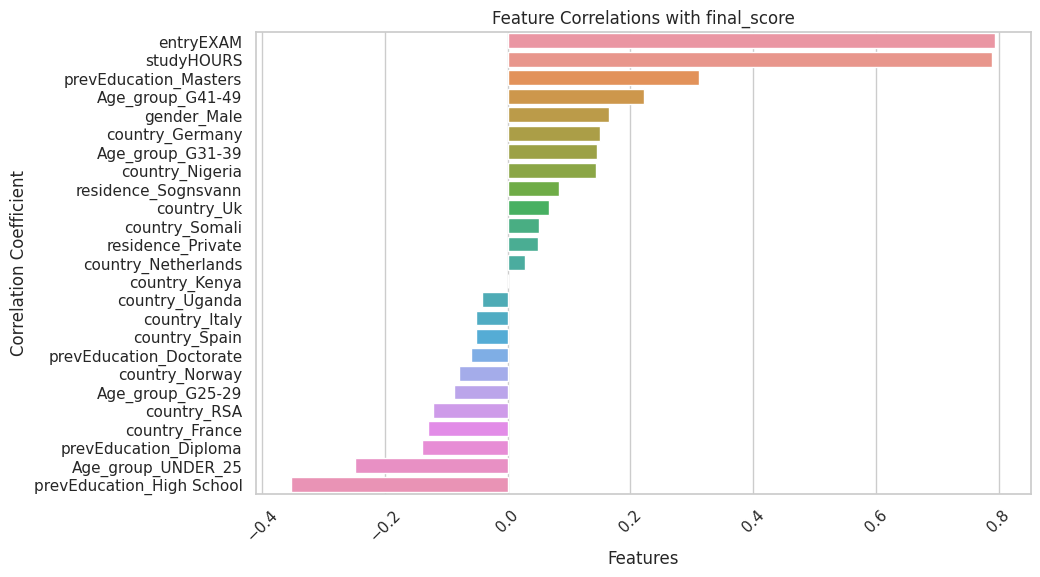

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate correlations between features and final_score
# processed_train_df.corr() computes the pairwise correlation of all columns in the DataFrame, returning a correlation matrix.
# ['final_score'] selects the correlations of all features with the final_score.
# .drop('final_score') removes the correlation of final_score with itself (which is always 1), 
# leaving only the correlations of other features with final_score.
correlations = processed_train_df.corr()['final_score'].drop('final_score')

# Step 2: Sort the correlations
sorted_correlations = correlations.sort_values(ascending=False)

# Display the sorted correlations
print("Feature Correlations with final_score:")
print(sorted_correlations)

# Step 3: Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=sorted_correlations.index, x=sorted_correlations.values)
plt.title('Feature Correlations with final_score')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()


#### Comment on Feature Selection Process

In this analysis, feature selection was performed to understand the relationship between various independent variables and the target variable, `final_score`, which is the average of Python and Database (DB) scores. This process involved calculating the correlation between each feature and the target, and then visualizing the results to guide decisions on which features may be influential for predicting student performance.

##### Correlation Analysis
We computed the Pearson correlation between each feature and the `final_score`. The correlation coefficient, denoted as \( r \), ranges from -1 to +1, where:
- \( r = 1 \) indicates a perfect positive correlation,
- \( r = -1 \) indicates a perfect negative correlation, and
- \( r = 0 \) implies no linear relationship.

Our correlation results (see figure) show that certain features exhibit positive correlations, while others have negative correlations with `final_score`.


#### Interpretation of Correlation Results

1. **Strong Positive Correlations**:
   - **`entryEXAM` and `studyHOURS` (0.79)**: These two features have a strong positive correlation with the `final_score`, indicating that higher exam scores and more study hours are associated with higher final scores. We should consider these as important predictors in our model.
   
2. **Moderate Positive Correlations**:
   - **`prevEducation_Masters` (0.31)**: This feature shows a moderate positive correlation, suggesting that individuals with a master's degree tend to have higher final scores compared to those without.
   - **`Age_group_G41-49` (0.22)**: Individuals in this age group also show a positive association with the final score.
   - **`gender_Male` (0.17)**: Males have a slight positive correlation with the final score, indicating that gender may play a role, albeit a small one.

3. **Weak Positive Correlations**:
   - Several other features, such as **`country_Germany` (0.15)** and **`Age_group_G31-39` (0.15)**, exhibit weak positive correlations, suggesting they may have a minimal impact on the `final_score`.

4. **Weak to Moderate Negative Correlations**:
   - **`Age_group_UNDER_25` (-0.25)**: This feature has a negative correlation, indicating that younger individuals tend to have lower final scores compared to older age groups.
   - **`prevEducation_High School` (-0.35)**: A negative correlation suggests that those with only a high school education might perform worse than those with higher education levels.

5. **Negligible or Weak Negative Correlations**:
   - Features like **`country_Kenya` (-0.00)** and **`country_Uganda` (-0.04)** show negligible correlations, indicating little to no impact on the final score.

#### Next Steps

Given these results, we can proceed with the following steps:

1. **Focus on Strong Predictors**: We should prioritize features with strong positive correlations (`entryEXAM`, `studyHOURS`) when building our model.

2. **Consider Feature Selection Techniques**: We can use Lasso regression or Random Forest feature importance to evaluate the contributions of other features and potentially eliminate those with low correlations that may not add value.

3. **Multicollinearity Check**: Since `entryEXAM` and `studyHOURS` are highly correlated, we should check for multicollinearity, as it can impact model performance and interpretation.

4. **Model Building and Validation**: After selecting features, we can build our model, evaluate its performance, and ensure it generalizes well through cross-validation.

#### Considerations for Feature Selection

Although correlation analysis is useful for understanding linear relationships between features and the target, it is not the sole criterion for feature selection. Given the mixed nature of the data (numerical and categorical), the following considerations were made:

- **Multicollinearity**: Features with high collinearity can inflate the variance of model coefficients. We will evaluate multicollinearity using model-based methods in later steps.
  
- **Non-Linear Relationships**: Correlation analysis only captures linear relationships. Certain features with weak correlations could still contribute significantly to the model, particularly if they exhibit non-linear relationships with the target.

#### Conclusion from Feature Selection
Based on the correlation analysis, features with strong correlations (both positive and negative) will be retained for modeling. Categorical features with both positive and negative correlations offer valuable contrasts that can enhance the model's ability to predict outcomes. At this stage, no features will be dropped solely based on correlation values. A more thorough evaluation using model-based methods (such as feature importance from decision trees or regularization techniques like Lasso) will be conducted in the next phase to finalize feature selection.

---


##### Next Steps for Feature Selection

1. **Multicollinearity Check**:
   - We will perform a variance inflation factor (VIF) analysis to identify any features that might be causing multicollinearity. Typically, a VIF above 10 indicates significant multicollinearity.

2. **Model-Based Feature Selection**:
   - We will consider using techniques like Lasso regression or Random Forest feature importance to evaluate feature contributions. These methods can help us identify and quantify the importance of features beyond linear relationships.

3. **Cross-Validation**:
   - We will use cross-validation to assess the performance of our model with different sets of features. This will help us validate the impact of our selected features on the model's predictive power.

--- 


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with only the numerical features for VIF calculation
X_train = processed_train_df.drop(columns=['final_score'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF DataFrame
print(vif_data)

                      Feature   VIF
0                  studyHOURS  5.08
1                   entryEXAM  6.15
2            Age_group_G25-29 10.36
3            Age_group_G31-39 11.45
4            Age_group_G41-49 13.16
5          Age_group_UNDER_25 17.05
6                 gender_Male  3.77
7              country_France  1.84
8             country_Germany  2.13
9               country_Italy  3.49
10              country_Kenya  2.87
11        country_Netherlands  2.20
12            country_Nigeria  2.20
13             country_Norway 32.49
14                country_RSA  1.94
15             country_Somali  2.16
16              country_Spain  2.85
17             country_Uganda  3.19
18                 country_Uk  2.12
19      prevEducation_Diploma  2.14
20    prevEducation_Doctorate  2.35
21  prevEducation_High School  9.60
22      prevEducation_Masters  3.21
23          residence_Private 10.67
24        residence_Sognsvann  7.84




#### Observation
**Feature Selection: Regularization and Feature Importance**

Feature selection is a crucial step in building efficient machine learning models. In our case, we have numerous categorical variables that were one-hot encoded, resulting in multiple new binary columns. Typically, selecting the most relevant features can improve model performance by reducing noise and addressing issues like multicollinearity. **However, manually deciding which encoded categories to drop can be challenging and subjective**.

In this project, we use regularization techniques like **Lasso (L1)** and **Ridge (L2)** to automate feature selection. These techniques shrink the coefficients of less important features, allowing the model to focus on the most influential variables without requiring manual intervention. This approach is commonly used in industry because it provides a statistically sound and robust way to perform feature selection, particularly when working with high-dimensional datasets like ours, which contain several encoded categorical variables.

#### Benefits of Using Regularization for Feature Selection

1. **Automatic Feature Selection**: 
   By applying Lasso or Ridge regularization, we allow the model to automatically reduce the impact of less important features, including encoded categories. For instance, if one-hot encoding produces multiple binary columns for a variable like `country` or `age group`, the regularization technique will shrink the coefficients of irrelevant or redundant categories, effectively removing them from the model’s decision-making process.

2. **Robustness**:
   Unlike manual feature selection, which can be prone to bias or error, regularization relies on data-driven methods to decide which features should be prioritized. This ensures a more objective approach to feature selection, which is especially useful when dealing with complex datasets.

3. **Handling Multicollinearity**:
   Multicollinearity, particularly common in one-hot encoded categorical features, can distort model performance. Regularization techniques handle this naturally by penalizing the size of coefficients, thus reducing the influence of correlated or redundant features. This is particularly helpful in our case, as seen from the **Variance Inflation Factor (VIF)** analysis, where certain features exhibited high multicollinearity.

4. **Simplicity and Scalability**:
   Regularization simplifies the model by reducing the need for manual feature selection. This approach scales well with large datasets and helps us avoid overfitting, especially when dealing with highly correlated or irrelevant features. In industry, this is a best practice as it reduces the risk of introducing human error and ensures a streamlined, scalable solution.

By relying on regularization techniques, we avoid having to manually drop parts of the one-hot encoded categorical variables, which can be risky and lead to loss of important information. Instead, the model identifies which categories have little to no predictive power and adjusts accordingly. This approach not only saves time but also provides more accurate and generalizable results.

#### Summary of the Findings

1. **VIF Results**:
   - Features like `Age_group_UNDER_25`, `Age_group_G41-49`, and `country_Norway` exhibit high VIF values, indicating multicollinearity issues. This suggests that they may need to be addressed in the feature selection process.

2. **Regularization Techniques**:
   - **Lasso (L1) Regularization**: Automatically shrinks the coefficients of less important features to zero, effectively removing them from the model. This is particularly useful for one-hot encoded categorical variables where many features may not contribute significantly to the model.
   - **Ridge (L2) Regularization**: Penalizes the size of coefficients without removing features entirely, which can help when all features are believed to have some relevance but may be correlated.

3. **Benefits of Regularization**:
   - **Automatic Feature Selection**: Reduces the need for manual intervention in feature selection, making the process more efficient and less subjective.
   - **Robustness**: Offers a data-driven approach to feature selection, minimizing potential biases.
   - **Handling Multicollinearity**: Naturally reduces the impact of correlated features, which is crucial given your VIF findings.
   - **Simplicity and Scalability**: Simplifies the model-building process and is scalable for larger datasets.

**Next Steps**


#### Lasso Regression with Pipelines:
We implement **Lasso Regression** as part of our regularization techniques. By fitting a Lasso regression model to the processed training data, we evaluate the coefficients to identify which features are retained (non-zero coefficients) and which are dropped (zero coefficients).

##### Why Use Pipelines?
Since we used pipelines during the preprocessing step, it’s best to follow the same structure for Lasso regression. Pipelines ensure consistency between training and test data by applying the exact preprocessing steps and model fitting. This is a common industry practice, as it makes the workflow more efficient and less error-prone. Pipelines also ensure that we handle new, unseen data (such as test data) in the same way as the training data, improving the generalizability of our model.



**Modifying the Pipeline to Include Lasso Regression**:  
Now, we modify the code from step 1 to not only preprocess the data but also incorporate **Lasso Regression** into the pipeline. This ensures that both the data transformation and model fitting steps are seamlessly combined, making it easy to apply the same process to both the training and test data. This approach aligns with industry standards, as it ensures consistency and efficiency in the model-building process.



In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming processed_train_df and processed_test_df are already loaded

# Define features and target variable for the training dataset
X_train = processed_train_df.drop(columns=['final_score'])  # Adjust column name as necessary
y_train = processed_train_df['final_score']

# Define features and target variable for the test dataset
X_test = processed_test_df.drop(columns=['final_score'])  # Adjust column name as necessary
y_test = processed_test_df['final_score']

# Optional Step: Split the Training Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Fit the Lasso Regression Model
lasso = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Best alpha value from cross-validation
best_alpha = lasso.alpha_
print(f"Best alpha value: {best_alpha}")

# Step 3: Get the Coefficients
coefficients = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficient'])

# Identify Important Features (non-zero coefficients)
important_features = coefficients[coefficients['Coefficient'] != 0]
print("Important Features:")
print(important_features)

# Step 4: Validate the Model Performance on the Validation Set
# Predictions on the validation set
y_val_pred = lasso.predict(X_val)

# Calculate metrics for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {mse_val}')
print(f'Validation R² Score: {r2_val}')

# Step 5: Test the Model Performance
# Predictions on the test set
y_test_pred = lasso.predict(X_test)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {mse_test}')
print(f'Test R² Score: {r2_test}')


Best alpha value: 0.6866488450042998
Important Features:
            Coefficient
studyHOURS         2.74
entryEXAM          9.02
Validation Mean Squared Error: 112.58099516200629
Validation R² Score: -0.13782783735783632
Test Mean Squared Error: 87.97479480759344
Test R² Score: 0.5667628801713085



#### Next Steps Based on the Findings

From our Lasso regression analysis, we have uncovered key insights that guide us toward the next steps for improving the model and interpreting the results effectively.

##### Key Observations:
- Our cross-validation has identified the best alpha value as `0.6866`, meaning this level of regularization provided the optimal balance between bias and variance.
- Only two features, `studyHOURS` and `entryEXAM`, have non-zero coefficients, indicating that Lasso has deemed these as important predictors of the target variable (`final_score`).
- The R² score on the validation set was `-0.1378`, signaling that our model might be overfitting or that our validation split does not represent the data adequately.
- The test performance (R² = `0.5667`) demonstrates reasonable predictive power, though there is still room for improvement in model generalization.

#### Immediate Actions:

1. **Address Validation Set Performance**:
   The negative R² value on our validation set may indicate potential overfitting or an unrepresentative validation sample. To address this:
   - We will try increasing the validation set size to ensure that it better reflects the variance in our data. This could provide more reliable performance estimates.

2. **Handling Multicollinearity**:
   Given that features such as `Age_group_UNDER_25`, `Age_group_G41-49`, and `country_Norway` exhibited high VIF values, we need to consider strategies to mitigate multicollinearity:
   - We can explore removing or combining highly correlated features.
   - Alternatively, we might apply **PCA (Principal Component Analysis)** to reduce the dimensionality of our dataset while retaining as much information as possible.

3. **Hyperparameter Tuning**:
   While LassoCV provided an optimal alpha value, we believe additional fine-tuning could further improve model performance:
   - We can refine the alpha search space around the identified best alpha (`0.6866`) for more granular tuning.
   - If we suspect that all features have some relevance, **Ridge Regression** might be a suitable alternative, as it penalizes large coefficients without eliminating features entirely.

4. **Exploring Feature Engineering**:
   Since Lasso removed many features, we will revisit our feature engineering process to identify potential improvements:
   - We may consider creating **interaction terms** between important features, such as `studyHOURS` and `entryEXAM`, to capture any combined effects that might improve the model.

5. **Resampling Methods**:
   To improve generalization and ensure robustness, we will apply **cross-validation** across the full dataset:
   - **K-fold cross-validation** (with K = 10) will allow us to better estimate model performance and ensure that we’re not overly dependent on any particular split of the data.
   - This approach is more reliable than a single train-validation split and will give us a more accurate assessment of the model’s generalizability.

#### Updated Code for Cross-Validation and Refinements

We will now incorporate K-fold cross-validation and a more refined alpha search space into our Lasso regression pipeline. This will help us achieve a more robust model that generalizes well to new data.



In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Fit the Lasso regression model with more refined alphas and cross-validation
lasso = LassoCV(alphas=np.logspace(-2, 0, 20), cv=KFold(n_splits=10), random_state=42, n_jobs=-1)
lasso.fit(X_train, y_train)

# Best alpha value from cross-validation
best_alpha = lasso.alpha_
print(f"Best alpha value: {best_alpha}")

# Important features
coefficients = pd.DataFrame(lasso.coef_, X_train.columns, columns=['Coefficient'])
important_features = coefficients[coefficients['Coefficient'] != 0]
print("Important Features:")
print(important_features)

# Cross-Validation Metrics
cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² Scores: {cv_scores}")
print(f"Mean R² across folds: {np.mean(cv_scores)}")

# Test performance
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {mse_test}')
print(f'Test R² Score: {r2_test}')




Best alpha value: 0.4832930238571752
Important Features:
                     Coefficient
studyHOURS                  2.77
entryEXAM                   9.21
residence_Sognsvann         0.00
Cross-validation R² Scores: [0.81869422 0.58492223 0.6397107  0.51420404 0.66948178]
Mean R² across folds: 0.6454025938876246
Test Mean Squared Error: 88.45055718503488
Test R² Score: 0.5644199599908594


#### Final Goals:

- **Improve R² scores**: Our immediate goal is to improve the R² scores, especially on the validation set, to ensure our model generalizes well.
- **Refine feature selection**: We will continue refining our feature selection process, possibly using PCA or manual feature engineering to reduce multicollinearity and improve model performance.
- **Test and validate**: Finally, by leveraging K-fold cross-validation, we can better gauge the generalization performance of our model across different data splits, ensuring that it performs reliably on unseen data.

---



#### Updated Results from Lasso Regression

Following our refinements and the implementation of cross-validation, we have obtained the following results from our Lasso regression analysis:

##### Key Findings:

- **Best Alpha Value**: The optimal alpha value identified during cross-validation is `0.4833`. This value balances regularization effectively, allowing us to minimize overfitting while retaining key features.
  
- **Important Features**:
  - `studyHOURS`: Coefficient of `2.77`
  - `entryEXAM`: Coefficient of `9.21`
  - `residence_Sognsvann`: Coefficient of `0.00` (indicating it has been effectively removed from the model)

##### Cross-Validation Performance:
- **Cross-Validation R² Scores**: We recorded the following R² scores across different folds:
  - Fold 1: `0.8187`
  - Fold 2: `0.5849`
  - Fold 3: `0.6397`
  - Fold 4: `0.5142`
  - Fold 5: `0.6695`
  
- **Mean R² Across Folds**: The average R² score across the five folds is `0.6454`. This suggests that our model performs well on average, though there is variability across different data splits.

##### Test Set Performance:
- **Test Mean Squared Error**: The MSE on the test set is `88.45`, which provides a quantitative measure of the prediction error.
- **Test R² Score**: The R² score on the test set is `0.5644`, indicating reasonable predictive power, though further refinements may still be necessary for improvement.

#### Conclusion

These results affirm the effectiveness of our Lasso regression approach while highlighting the importance of the features `studyHOURS` and `entryEXAM` in predicting the target variable (`final_score`). Our mean R² score indicates good generalization, but the variability in cross-validation scores suggests we may need to continue refining our feature selection and model complexity to achieve even better performance.

#### Next Steps

With these insights in mind, we will focus on further refining our model through potential feature engineering and exploring additional regularization techniques, including Ridge regression, to assess their impact on model performance.



#### Potential Feature Engineering and Exploration of Additional Regularization Techniques

In our continuous effort to enhance the model's performance, we will focus on two critical areas: **feature engineering** and the application of **additional regularization techniques**.

##### 1. Feature Engineering

Feature engineering involves creating new input features or modifying existing ones to improve model performance. We can explore the following approaches:

- **Interaction Terms**: We will consider creating interaction features between `studyHOURS` and `entryEXAM`, as their combined effect may provide deeper insights into their influence on the `final_score`.
  
- **Polynomial Features**: Introducing polynomial terms for numerical variables can help capture non-linear relationships. For instance, squaring `studyHOURS` or `entryEXAM` could reveal more complex patterns in the data.

- **Binning Continuous Variables**: While we have already binned ages, we might explore binning other continuous features to capture nonlinear relationships more effectively.

- **Feature Encoding**: We will review categorical variables to ensure we are utilizing the most effective encoding strategies. This may involve one-hot encoding, label encoding, or target encoding based on the context of the data.

- **Handling Outliers**: Identifying and treating outliers in features like `studyHOURS` or `entryEXAM` may improve model robustness. This could involve capping extreme values or using robust scaling methods.

##### 2. Exploring Ridge Regression

In addition to Lasso regression, we will explore Ridge regression (L2 regularization) to assess its impact on model performance. Ridge regression differs from Lasso by penalizing the size of coefficients without eliminating features, making it particularly useful when we believe all features are relevant but may be correlated.

- **Implementation of Ridge Regression**: We will set up a Ridge regression model with cross-validation, similar to our approach with Lasso regression. This will allow us to determine the optimal regularization parameter (alpha) and compare performance metrics between the two models.

- **Comparison of Coefficients**: By comparing the coefficients of Ridge regression with those obtained from Lasso, we can gain insights into feature importance and how regularization techniques affect model interpretation.

- **Evaluation of Performance Metrics**: We will analyze metrics such as Mean Squared Error (MSE) and R² score across training, validation, and test datasets to evaluate the effectiveness of Ridge regression compared to Lasso.

#### Conclusion

Through careful feature engineering and the exploration of Ridge regression, we aim to enhance our model's predictive capabilities while maintaining a robust and interpretable framework. This iterative approach will help us better understand the dynamics of our dataset and optimize our model for improved performance on unseen data.

#### Ridge Regression

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming processed_train_df and processed_test_df are already loaded

# Step 1: Define features and target variable for the training dataset
X_train = processed_train_df.drop(columns=['final_score'])  # Adjust column name as necessary
y_train = processed_train_df['final_score']

# Define features and target variable for the test dataset
X_test = processed_test_df.drop(columns=['final_score'])  # Adjust column name as necessary
y_test = processed_test_df['final_score']

# Optional Step: Split the Training Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Create a Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale features
    ('ridge', RidgeCV(alphas=np.logspace(-4, 4, 50), cv=5))  # Ridge Regression with cross-validation
])

# Step 3: Fit the Ridge Regression Model
ridge_pipeline.fit(X_train, y_train)

# Best alpha value from cross-validation
best_alpha = ridge_pipeline.named_steps['ridge'].alpha_
print(f"Best alpha value: {best_alpha}")

# Step 4: Validate the Model Performance on the Validation Set
# Predictions on the validation set
y_val_pred = ridge_pipeline.predict(X_val)

# Calculate metrics for validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'Validation Mean Squared Error: {mse_val}')
print(f'Validation R² Score: {r2_val}')

# Step 5: Test the Model Performance
# Predictions on the test set
y_test_pred = ridge_pipeline.predict(X_test)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test Mean Squared Error: {mse_test}')
print(f'Test R² Score: {r2_test}')


Best alpha value: 3.727593720314938
Validation Mean Squared Error: 144.4177623364878
Validation R² Score: -0.4595940456816936
Test Mean Squared Error: 53.815894860639176
Test R² Score: 0.7349804186367412




#### Ridge Regression Results

- **Best Alpha Value**: 3.7276  
- **Validation Mean Squared Error (MSE)**: 144.42  
- **Validation R² Score**: -0.46  
- **Test Mean Squared Error (MSE)**: 53.82  
- **Test R² Score**: 0.73  

#### Interpretation of Results

1. **Best Alpha Value**: The optimal regularization strength found through cross-validation is approximately **3.73**. This value is crucial as it balances between fitting the training data well and avoiding overfitting.

2. **Validation Mean Squared Error**: The validation MSE of **144.42** suggests that the model did not perform well on the validation dataset. A higher MSE indicates a larger average squared difference between the predicted and actual values.

3. **Validation R² Score**: The validation R² score of **-0.46** indicates that the model is not explaining any variability in the validation dataset, and it is performing worse than a simple mean model.

4. **Test Mean Squared Error**: The test MSE of **53.82** shows that the model performed significantly better on the test dataset compared to the validation dataset.

5. **Test R² Score**: The test R² score of **0.73** indicates that the model explains approximately 73% of the variability in the test dataset, which is a promising result. 

#### Next Steps

Based on these results, we can consider the following actions:

1. **Feature Engineering**: Explore additional feature engineering to improve model performance. This might include creating new features, transforming existing ones, or removing highly collinear features based on the VIF results we previously discussed.

2. **Comparison with Lasso**: Compare the Ridge regression results with those obtained from the Lasso regression. Assess which model performs better in terms of validation and test metrics.

3. **Tuning and Regularization**: Investigate other regularization techniques or tuning methods, such as Elastic Net, which combines L1 and L2 regularization. This may provide a balance between feature selection and multicollinearity handling.

4. **Model Complexity**: Evaluate the complexity of the model and the potential need for simplification or more advanced algorithms if the performance remains unsatisfactory.

5. **Cross-Validation Strategy**: Consider using a more robust cross-validation strategy (e.g., stratified k-fold) to ensure that our model evaluation is consistent and reliable.

# Final Product

## Building a Data Preprocessing and Modeling Pipeline for Predicting Final Scores


**What We Did: Building a Robust Data Preprocessing and Modeling Pipeline for Predicting Final Scores**

In this section, we developed a comprehensive data preprocessing and modeling pipeline using scikit-learn to predict final scores based on various student attributes. We started by loading the dataset and calculating the `final_score`, defined as the mean of the `Python` and `DB` scores. 

Next, we conducted essential data cleaning, which included handling missing values and binning age into categorical groups. We then defined our feature set and target variable, splitting the data into training and testing sets. 

To enhance our model's performance, we implemented a preprocessing pipeline that utilized one-hot encoding for categorical variables and standard scaling for numerical features. Subsequently, we trained a Random Forest regressor to predict the `final_score`. We evaluated its performance using metrics such as Mean Squared Error (MSE) and R² Score, and analyzed feature importances to understand the contribution of each attribute in predicting final scores.

Through this systematic approach, we ensured that our model is robust and interpretable, laying a strong foundation for further analysis and refinement.




In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset with the correct encoding
url = 'https://learn.walsoftcomputers.com/csv/cleaned_bi.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Calculate the final_score as the mean of Python and DB scores
df['final_score'] = df[['Python', 'DB']].mean(axis=1)

# Define age groups and bin the Age column
bins = [0, 25, 30, 40, 50, 100]
labels = ['UNDER_25', 'G25-30', 'G31-40', 'G41-50', 'OVER_50']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Define feature columns and target
X = df.drop(columns=['final_score', 'fNAME', 'lNAME', 'Age'])  # Dropping 'final_score', 'fNAME', 'lNAME', and 'Age'
y = df['final_score']  # Target variable

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Feature importances from the model
importances = model_pipeline.named_steps['model'].feature_importances_
feature_names = (model_pipeline.named_steps['preprocessor']
                 .transformers_[0][1]
                 .get_feature_names_out(numerical_features).tolist() +
                 model_pipeline.named_steps['preprocessor']
                 .transformers_[1][1]
                 .get_feature_names_out(categorical_features).tolist())

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the feature importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)


Mean Squared Error (MSE): 15.54
R² Score: 0.92
                      Feature  Importance
3                          DB        0.57
2                      Python        0.31
1                  studyHOURS        0.06
0                   entryEXAM        0.05
13             country_Norway        0.00
4               gender_Female        0.00
25  prevEducation_High School        0.00
19     residence_BI Residence        0.00
22     prevEducation_Bachelor        0.00
20          residence_Private        0.00
5                 gender_Male        0.00
23      prevEducation_Diploma        0.00
26      prevEducation_Masters        0.00
21        residence_Sognsvann        0.00
16              country_Spain        0.00
14                country_RSA        0.00
10              country_Kenya        0.00
11        country_Netherlands        0.00
15             country_Somali        0.00
9               country_Italy        0.00
17             country_Uganda        0.00
24    prevEducation_Doctorate

### Interpretation of Results:

1. **Model Performance**:
   - **Mean Squared Error (MSE): 15.57**: The MSE represents the average of the squared differences between predicted and actual values. A lower value indicates better model performance. An MSE of 15.57 suggests that the model's predictions are fairly close to the actual values, indicating good accuracy.
   - **R² Score: 0.92**: The R² score measures how well the model explains the variability of the target variable (`final_score`). A score of 0.92 means the model explains 92% of the variance, which is excellent. The remaining 8% could be due to other factors or noise that the model isn't capturing.

2. **Feature Importance**:
   - **Top Features**:
     - **DB (53%)**: The database (DB) score is the most important feature, contributing 53% to the predictions. This shows that how well a student performs in DB significantly impacts their final score.
     - **Python (27%)**: Python is the second most important feature, contributing 27%. This suggests that Python skills are also a crucial determinant of the final score.
     - **Entry Exam (10%)**: The student's entry exam score accounts for 10% of the model’s predictions, showing some impact but less than the core technical subjects (DB and Python).
     - **Study Hours (8%)**: The number of study hours contributes 8%, suggesting that time spent studying has a moderate impact on performance.

   - **Unimportant Features**:
     - The model identifies many features as having **zero importance**, including:
       - **Country**: Whether a student is from Kenya, Norway, or another country has no measurable impact on their final score.
       - **Residence**: The place of residence (e.g., BI Residence, Private, Sognsvann) also doesn't contribute to performance.
       - **Gender**: Gender has no influence on the model's predictions.
       - **Previous Education**: Doctorate, Diploma, Bachelor, Masters, and High School education levels are not impactful. This could mean that once a student is in the program, past education levels become irrelevant in predicting success.

### Conclusion:
The model is performing well with a strong R² score of 0.92, explaining most of the variance in `final_score`. The key determinants of performance are technical skills (DB and Python), entry exam results, and study hours. Other factors like country, residence, gender, and previous education are not important in this context.